# **II4035: Exploratory Data Analysis & Modelling**

18221130 - Rayhan Maheswara Pramanda | `Tugas Besar II4035 Intelligent System`

**Columns Explanation**

This dataset contains 13 clinicopathologic features collected in the span of 15 years over 383 patients. Each patient is tracked for at least 10 years. Below are the columns in the dataset and their meanings:


1.   **Age**: Patient's age (number)
2.   **Gender**: Patient's gender (male/female)
3.   **Smoking**: Whether patient is currently smoking (binary)
4.   **Hx Smoking**: Whether patient smoked in the past (binary)
5.   **Hx Radiotheraphy**: Whether patient had a radiotherapy in the past (binary)
6.   **Tyhroid Function**: Patient's thyroid function
7.   **Physical Examination**: Patient's physical examination detail
8.   **Adenopathy**: Presence of adenopathy in the patient
9.   **Pathology**: Patient's pathology examination result
9.   **Focality**: Patient's focality information (single or multiple)
10.   **Risk**: Patient's risk
11.   **T**: Describes patient's tumour size (Values are within the range T0-T3,T0 indicated no presence of tumour, T4 indicates progressive enlargement)
12.   **N**: Describes the patient's regional lymph node involvement of the tumour (Values are within the range N0-N3, N0 indicates no regional spread, N3 indicates progressive distal spread)
13. **M**: Describes the presence of patient's distant metastases of the primary tumor (M0 indicates no evidence of distant metastases has been found, M1 indicates that evidence of distant metastases is present)
13.   **Stage**: Patient's cancer stage
14. **Response**: Response details
15. **Recurred**: Whether the cancer reccured in the patient

**References:**

Rosen RD, Sapra A. TNM Classification. [Updated 2023 Feb 13]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2024 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK553187/


## **Basic Data Preparation**

We will perform basic data preparation to handle cases such as null values, invalid data entries, and making the dataset itself easier to work with. However, there will be no sophisticated data preparation done in this phase (like feature extraction etc).

In [1]:
## Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [141]:
# Load the file
filename = '/content/drive/MyDrive/Thyroid_Diff.csv'

df = pd.read_csv(filename)

In [3]:
# Rename columns for clarity
df.rename(columns={'Hx Smoking': 'History of Smoking',
                   'Hx Radiothreapy': 'History of Radiotherapy',
                   'Pathology': 'Types of Thyroid Cancer',
                   'T': 'Tumor Spread',
                   'N': 'Lymph Nodes Involvement',
                   'M': 'Cancer Metastasis Presence',
                  'Response' : 'Response to Treatment'}, inplace=True)

In [143]:
# Show three data from the top
df.head(10)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,Yes,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,Yes,No,Clinical Hyperthyroidism,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
# Show three data from the bottom
df.tail(3)

,Age,Gender,Smoking,History of Smoking,History of Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer,Focality,Risk,Tumor Spread,Lymph Nodes Involvement,Cancer Metastasis Presence,Stage,Response to Treatment,Recurred
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [6]:
## Check whether there are null values
df.isnull().sum()

Age                           0
Gender                        0
Smoking                       0
History of Smoking            0
History of Radiotherapy       0
Thyroid Function              0
Physical Examination          0
Adenopathy                    0
Types of Thyroid Cancer       0
Focality                      0
Risk                          0
Tumor Spread                  0
Lymph Nodes Involvement       0
Cancer Metastasis Presence    0
Stage                         0
Response to Treatment         0
Recurred                      0
dtype: int64

Since there's no null value, then we will not need to do null handling

In [7]:
## Print the number of rows
df.shape[0]

383

In [8]:
## Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         383 non-null    int64 
 1   Gender                      383 non-null    object
 2   Smoking                     383 non-null    object
 3   History of Smoking          383 non-null    object
 4   History of Radiotherapy     383 non-null    object
 5   Thyroid Function            383 non-null    object
 6   Physical Examination        383 non-null    object
 7   Adenopathy                  383 non-null    object
 8   Types of Thyroid Cancer     383 non-null    object
 9   Focality                    383 non-null    object
 10  Risk                        383 non-null    object
 11  Tumor Spread                383 non-null    object
 12  Lymph Nodes Involvement     383 non-null    object
 13  Cancer Metastasis Presence  383 non-null    object

In [9]:
# Check for outlier/invalid data entry
i = 1

for key in df.columns:
  print(str(i) + ". Values for", key, df[key].unique())
  i += 1

1. Values for Age [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
2. Values for Gender ['F' 'M']
3. Values for Smoking ['No' 'Yes']
4. Values for History of Smoking ['No' 'Yes']
5. Values for History of Radiotherapy ['No' 'Yes']
6. Values for Thyroid Function ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
7. Values for Physical Examination ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
8. Values for Adenopathy ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
9. Values for Types of Thyroid Cancer ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
10. Values for Focality ['Uni-Focal' 'Multi-Focal']
11. Values for Risk ['Low' 'Intermediate' 'High']
12. Values for Tumor Spread ['T1a' 

Based on the result above, all the entries are valid and appropriate.

In [10]:
## Print all the column names
for column in df.columns:
    if df[column].dtypes == 'object':
        print(column)

Gender
Smoking
History of Smoking
History of Radiotherapy
Thyroid Function
Physical Examination
Adenopathy
Types of Thyroid Cancer
Focality
Risk
Tumor Spread
Lymph Nodes Involvement
Cancer Metastasis Presence
Stage
Response to Treatment
Recurred


In [11]:
## Basic numeric stats
df['Age'].describe()

count    383.000000
mean      40.866841
std       15.134494
min       15.000000
25%       29.000000
50%       37.000000
75%       51.000000
max       82.000000
Name: Age, dtype: float64

# **Data Visualisation**

In order to make a good model we need to understand the dataset and how each feature relates to each other. Hence, we will perform various data visualisation techniques to better understand the data.

### **Age**

<Axes: title={'center': 'Age Distribution Boxplot'}, xlabel='Age'>

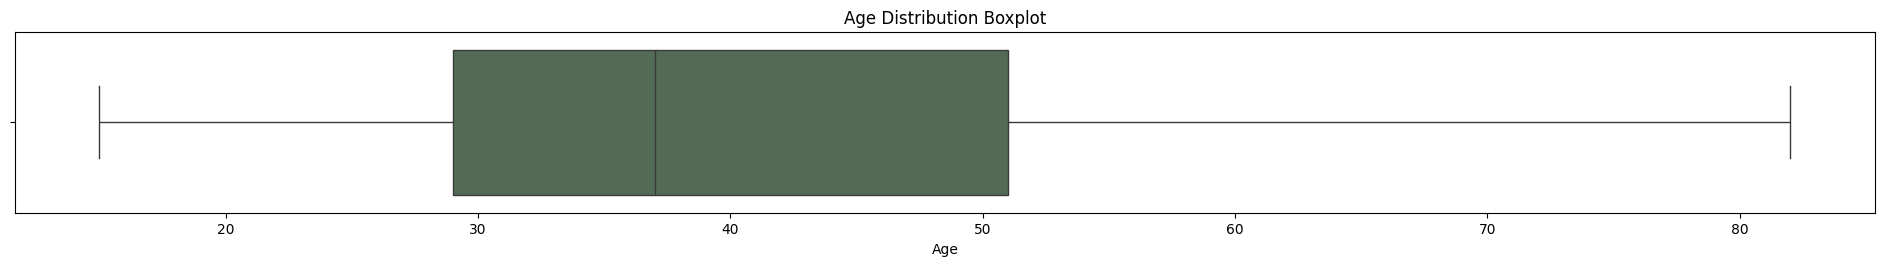

In [12]:
plt.figure(figsize=(24,8))
plt.subplot(3,1,1)
plt.xlabel('Age')
plt.title('Age Distribution Boxplot')
sns.boxplot(df['Age'], orient='h', color="#4F6F52", legend="auto")

<Axes: title={'center': 'Age Distribution Violinplot'}, xlabel='Age'>

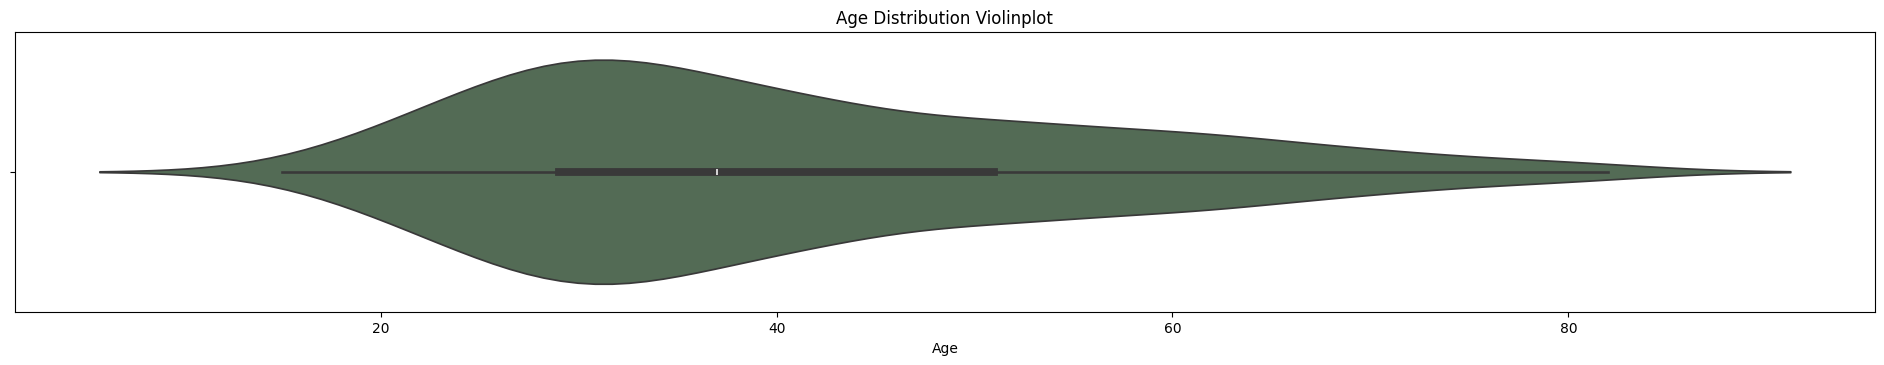

In [13]:
plt.figure(figsize=(24,8))
plt.subplot(2,1,1)
plt.title('Age Distribution Violinplot')
sns.violinplot(x=df["Age"], color="#4F6F52", density_norm="width", legend="auto")

<Axes: title={'center': 'Age Distribution Histogram'}, xlabel='Age', ylabel='Frequency'>

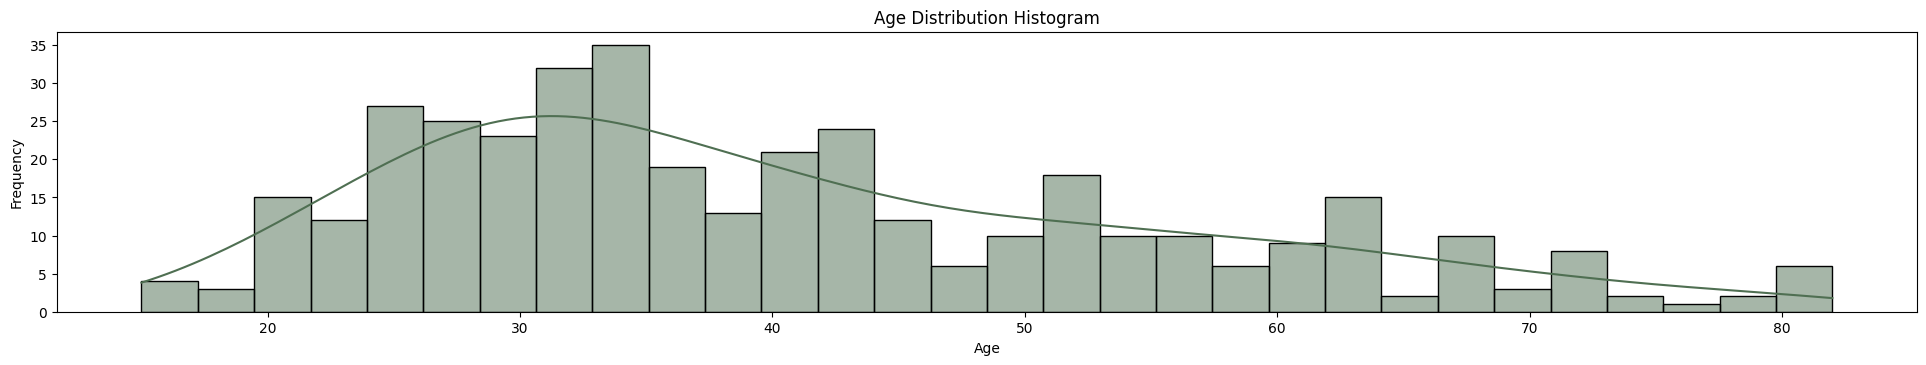

In [14]:
plt.figure(figsize=(24,8))
plt.subplot(2,1,1)
plt.ylabel("Frequency")
plt.title('Age Distribution Histogram')
sns.histplot(df['Age'], bins=30, color="#4F6F52", legend="auto", kde=True)

In [15]:
print("Skewness of the Age Distribution:", df['Age'].skew())

Skewness of the Age Distribution: 0.7197318617338616


Based on the data above we can see that the age distribution is **leaning to the left side** (positively skewed). This can be seen with the various graph above that shows most of the data is **concentrated in the 20-40 group of age**. This means that thyroid cancer can happen, and in fact, mostly happens for younger people.

### **Gender**

In [16]:
df['Gender'].value_counts()

Gender
F    312
M     71
Name: count, dtype: int64

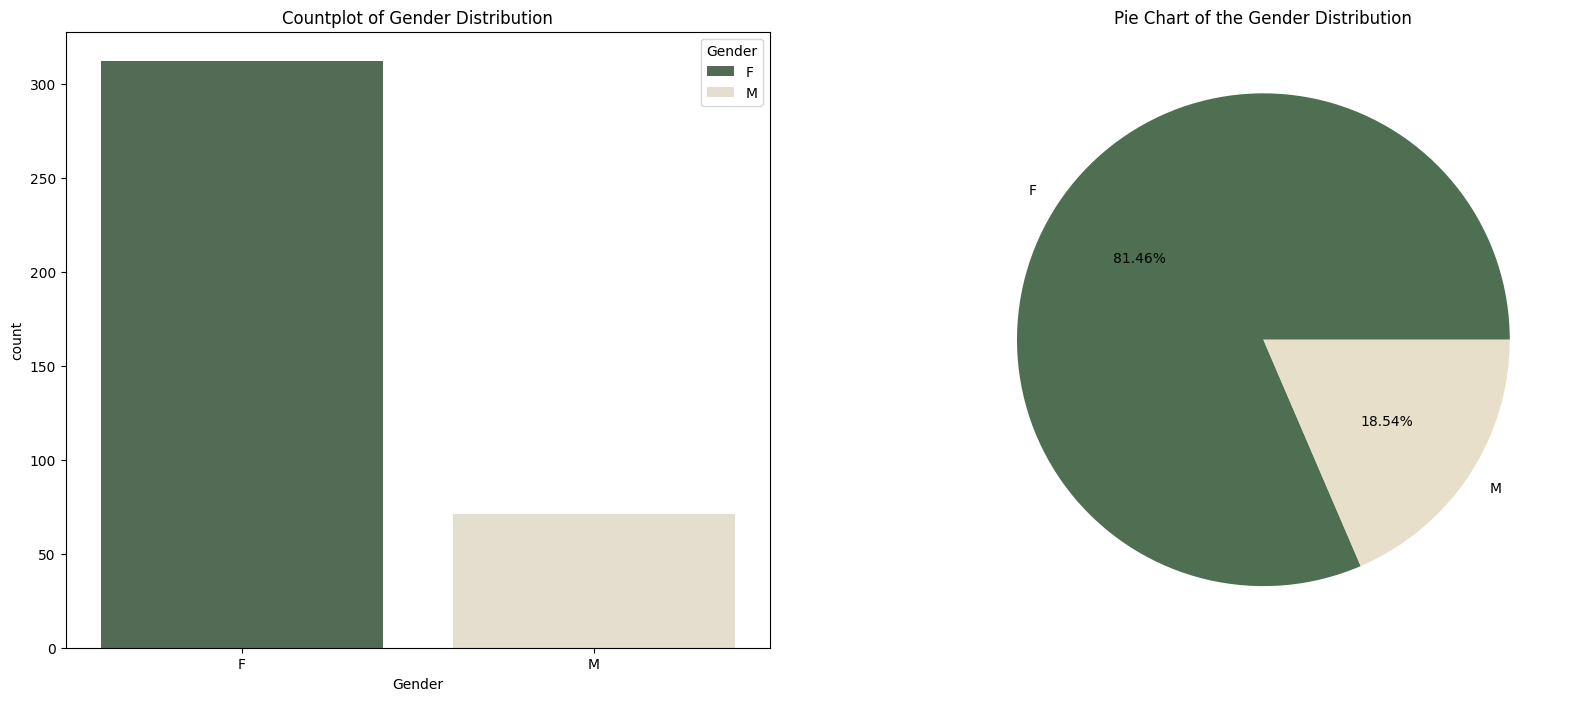

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

## Make the countplot
sns.countplot(x="Gender", hue="Gender", data=df, stat="count", palette=["#4F6F52", "#E8DFCA"], legend="full", ax=axes[0])
axes[0].set_title("Countplot of Gender Distribution")

## Make the pie plot
genderData = df['Gender'].value_counts()
axes[1].set_title("Pie Chart of the Gender Distribution")
plt.pie(labels=genderData.index, x=genderData.values, autopct='%.2f%%', colors=["#4F6F52", "#E8DFCA"])
plt.show()

plt.show()

Based on the count plot above, we can see that the majority (>80%) of the patients are **female**. Hence, we can infer that women are more likely to get thyroid cancer, about 3 times more likely than men.

### **Smoking**

In [18]:
df['Smoking'].value_counts()

Smoking
No     334
Yes     49
Name: count, dtype: int64

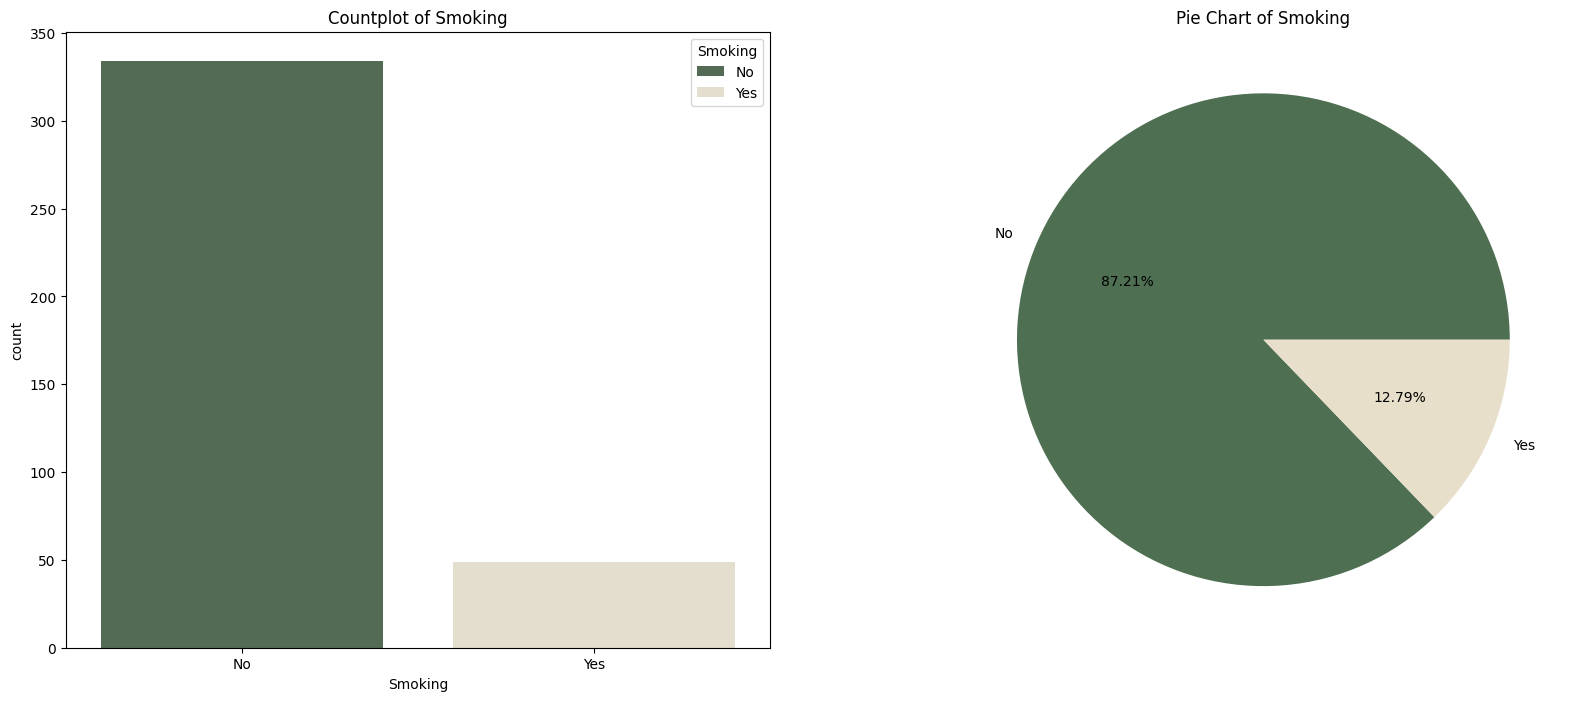

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

## Make the countplot
sns.countplot(x="Smoking", hue="Smoking", data=df, stat="count", palette=["#4F6F52", "#E8DFCA"], legend="full", ax=axes[0])
axes[0].set_title("Countplot of Smoking")

## Make the pie plot
smokingData = df['Smoking'].value_counts()
axes[1].set_title("Pie Chart of Smoking")
plt.pie(labels=smokingData.index, x=smokingData.values, autopct='%.2f%%', colors=["#4F6F52", "#E8DFCA"])
plt.show()

plt.show()

Based on the graphs above, the majority (>87%) of patients are not currently smoking. **Thus, smoking has minimal correlation with having thyroid cancer.**

### **History of Smoking**

In [20]:
df['History of Smoking'].value_counts()

History of Smoking
No     355
Yes     28
Name: count, dtype: int64

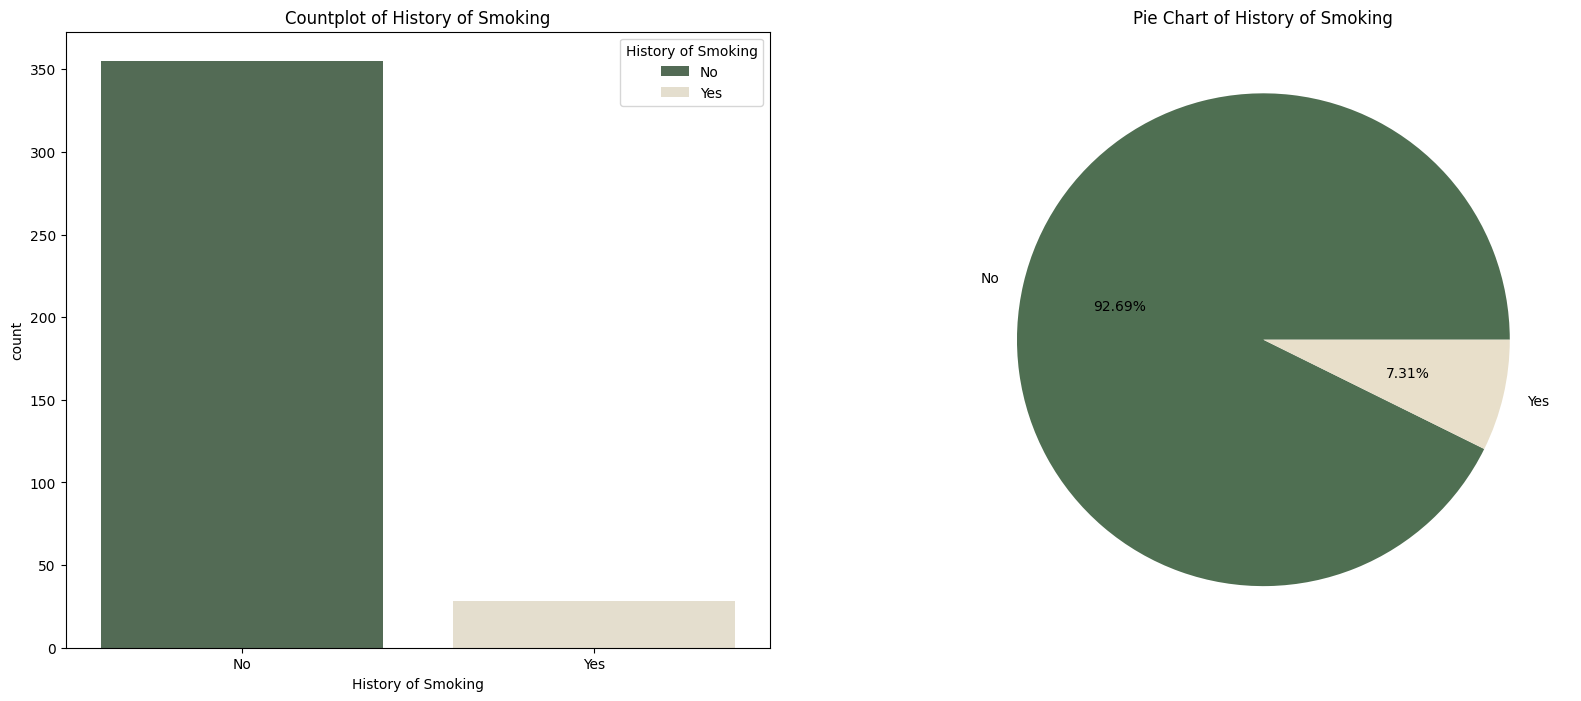

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

## Make the countplot
sns.countplot(x="History of Smoking", hue="History of Smoking", data=df, stat="count", palette=["#4F6F52", "#E8DFCA"], legend="full", ax=axes[0])
axes[0].set_title("Countplot of History of Smoking")

## Make the pie plot
historySmokingData = df['History of Smoking'].value_counts()
axes[1].set_title("Pie Chart of History of Smoking")
plt.pie(labels=historySmokingData.index, x=historySmokingData.values, autopct='%.2f%%', colors=["#4F6F52", "#E8DFCA"])
plt.show()

plt.show()

Based on the graphs above, we can see that the majority (>90%) of the patients never smoke. **Thus, smoking has minimal correlation with having thyroid cancer.**

### **Relationship Between Age and Cancer Stage**

<Axes: title={'center': 'Boxplot of Age and Cancer Stage'}, xlabel='Stage', ylabel='Age'>

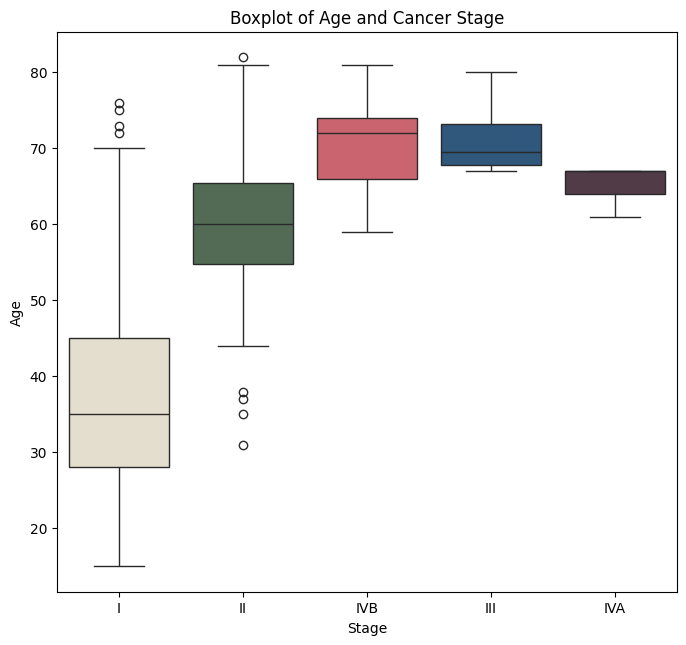

In [22]:
plt.figure(figsize=(8,16))
plt.subplot(2,1,2)
plt.title("Boxplot of Age and Cancer Stage")
sns.boxplot(x="Stage", y="Age", hue="Stage", data=df, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789", "#533747"], legend="auto")

Based on the box plot above, we can see that the majority of late stage cancer occur in older people. Which means older people usually have cancer with later stage.

### **Relationship Between Age and Tumor Spread**

<Axes: title={'center': 'Boxplot of Age and Tumor Spread'}, xlabel='Tumor Spread', ylabel='Age'>

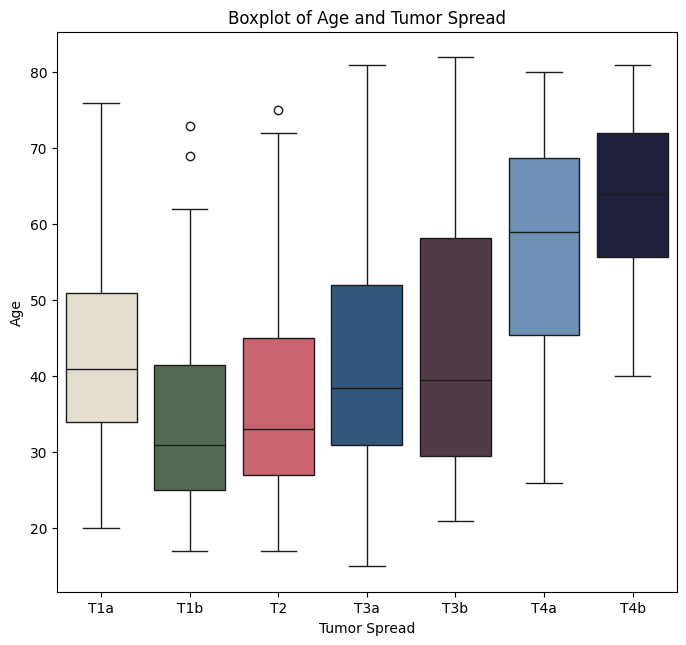

In [23]:
plt.figure(figsize=(8,16))
plt.subplot(2,1,2)
plt.title("Boxplot of Age and Tumor Spread")
sns.boxplot(x="Tumor Spread", y="Age", hue="Tumor Spread", data=df, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789", "#533747", "#6290C3", "#1A1B41"], legend="auto")

Based on the box plot above, we can see that the spread of the tumor worsen as people age. Which means the spread of tumor correlates with the patient's age.

### **Relationship Between Age and Metastases**

<Axes: title={'center': 'Boxplot of Age and Metastases'}, xlabel='Cancer Metastasis Presence', ylabel='Age'>

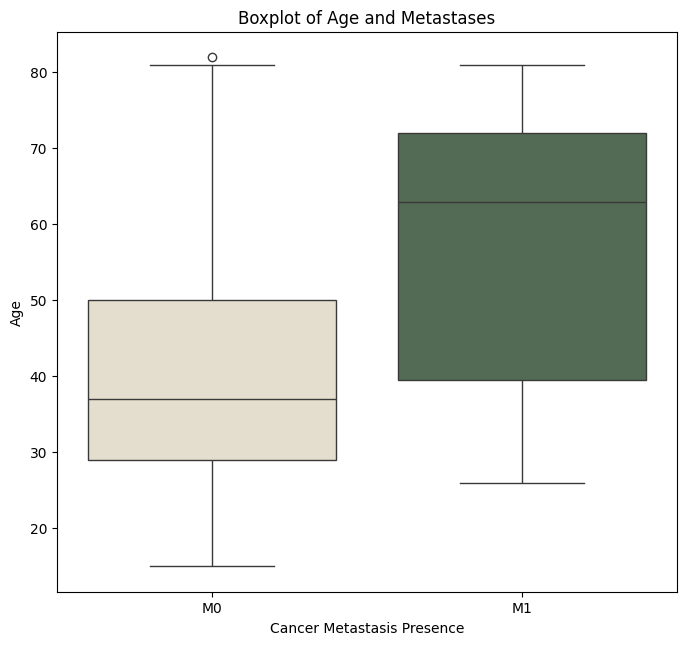

In [24]:
plt.figure(figsize=(8,16))
plt.subplot(2,1,2)
plt.title("Boxplot of Age and Metastases")
sns.boxplot(x="Cancer Metastasis Presence", y="Age", hue="Cancer Metastasis Presence", data=df, palette=["#E8DFCA", "#4F6F52"], legend="auto")

Based on the box plot above, we can see that the majority of metastases patients tend to be older. Which means age correlates with the presence of metastases.

### **History of Radiotherapy**

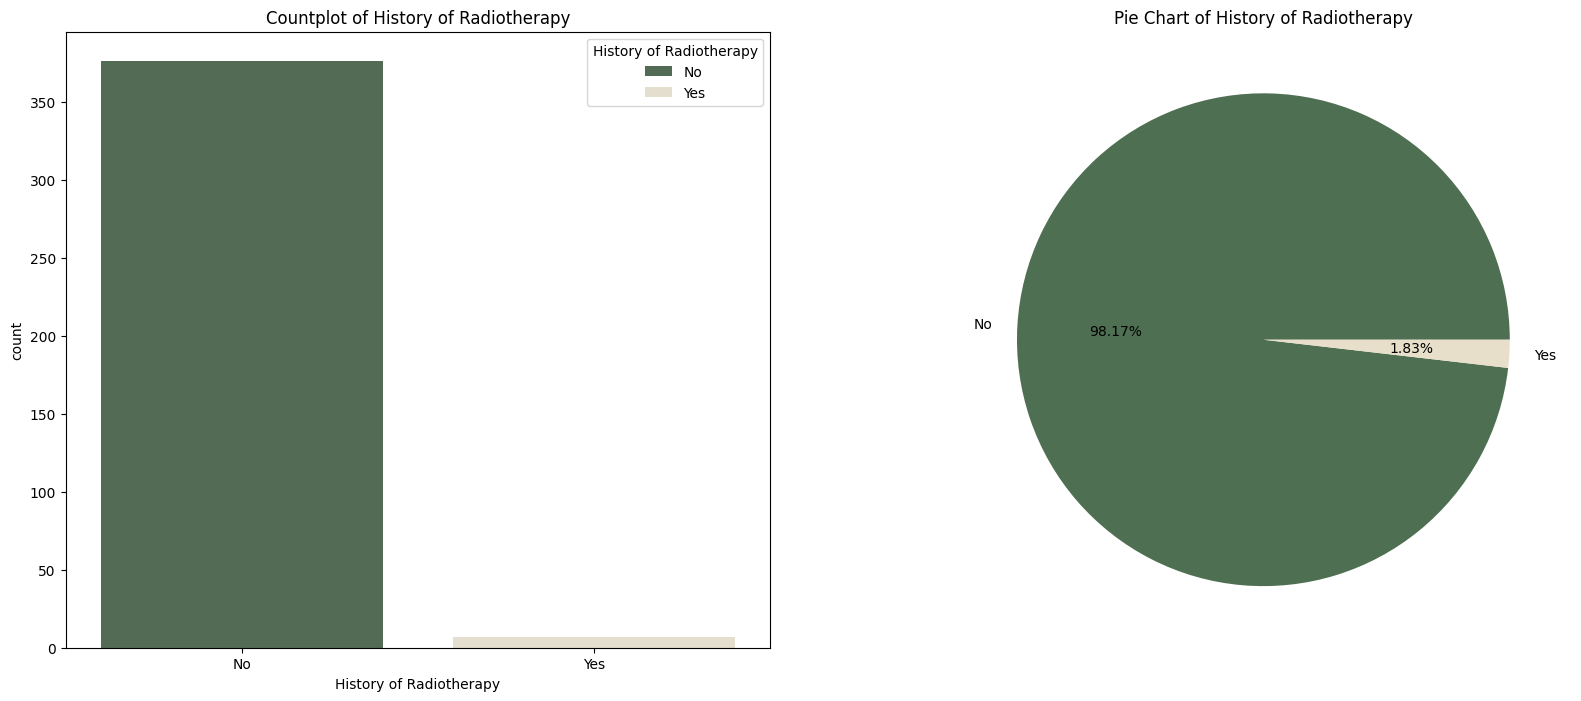

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

## Make the countplot
sns.countplot(x="History of Radiotherapy", hue="History of Radiotherapy", data=df, stat="count", palette=["#4F6F52", "#E8DFCA"], legend="full", ax=axes[0])
axes[0].set_title("Countplot of History of Radiotherapy")

## Make the pie plot
historyRadiotherapyData = df['History of Radiotherapy'].value_counts()
axes[1].set_title("Pie Chart of History of Radiotherapy")
plt.pie(labels=historyRadiotherapyData.index, x=historyRadiotherapyData.values, autopct='%.2f%%', colors=["#4F6F52", "#E8DFCA"])
plt.show()

Based on the graphs above, the majority of the patients (>98%) have no history of radiotherapy. Which means having radiotherapy generally has no effect to the probability of having thyroid cancer.

### **Relationship Between Risk and Age**

<Axes: title={'center': 'Violinplot of Age and Risk'}, xlabel='Risk', ylabel='Age'>

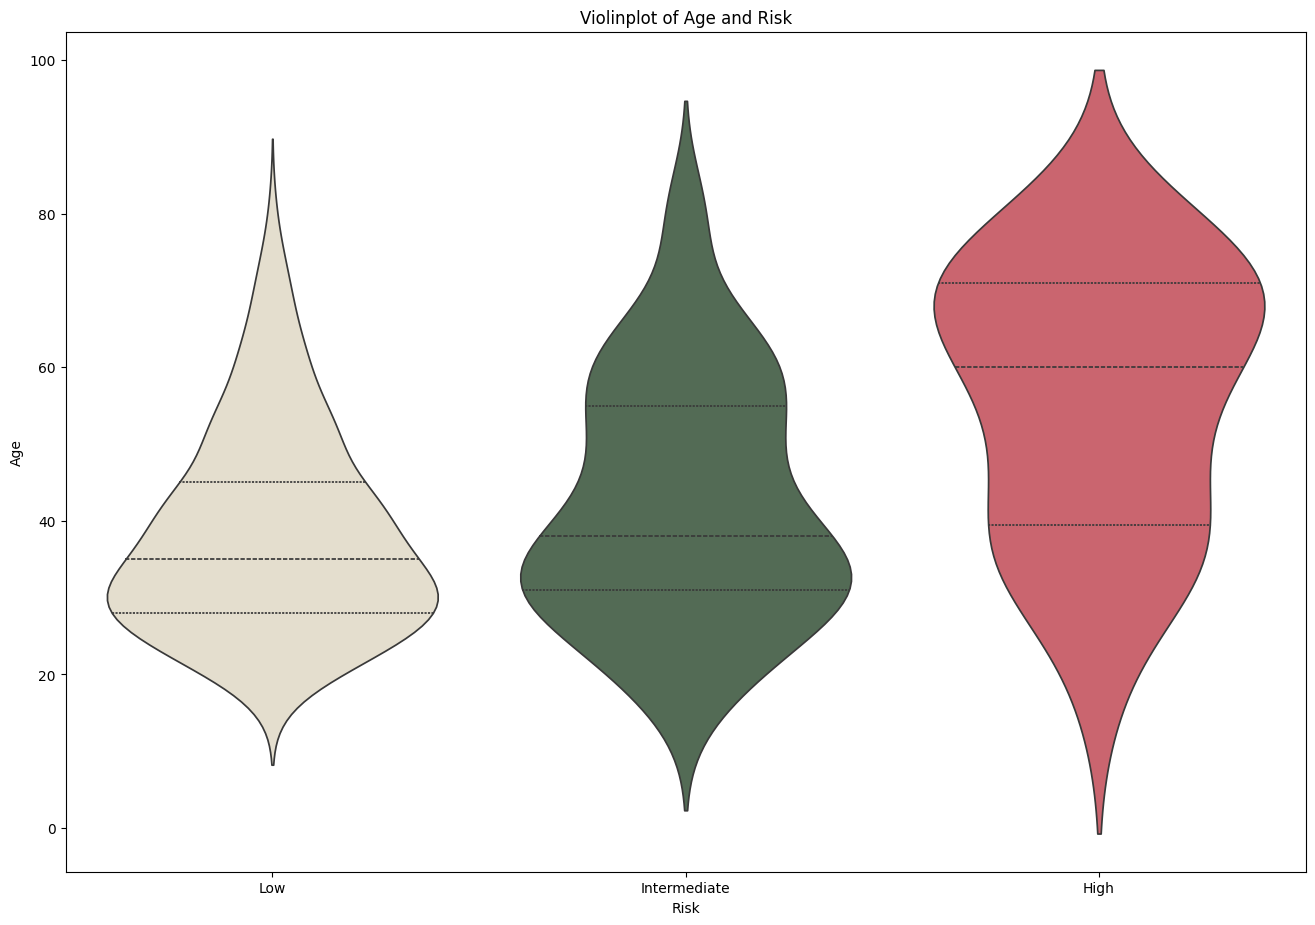

In [26]:
plt.figure(figsize=(16,24))
plt.subplot(2,1,2)
plt.title("Violinplot of Age and Risk")
sns.violinplot(x="Risk", y="Age", hue="Risk", data=df, palette=["#E8DFCA", "#4F6F52", "#db5461"], inner="quartile", legend="auto")

Based on the violinplot we can see that the **risk gets higher for older people**. That is supported by the fact that the width of the violin gets wider for each higher risk as the patient gets older.

### **Relationship between Age and Thyroid Function**

<Axes: title={'center': 'Violinplot of Age and Thyroid Function'}, xlabel='Thyroid Function', ylabel='Age'>

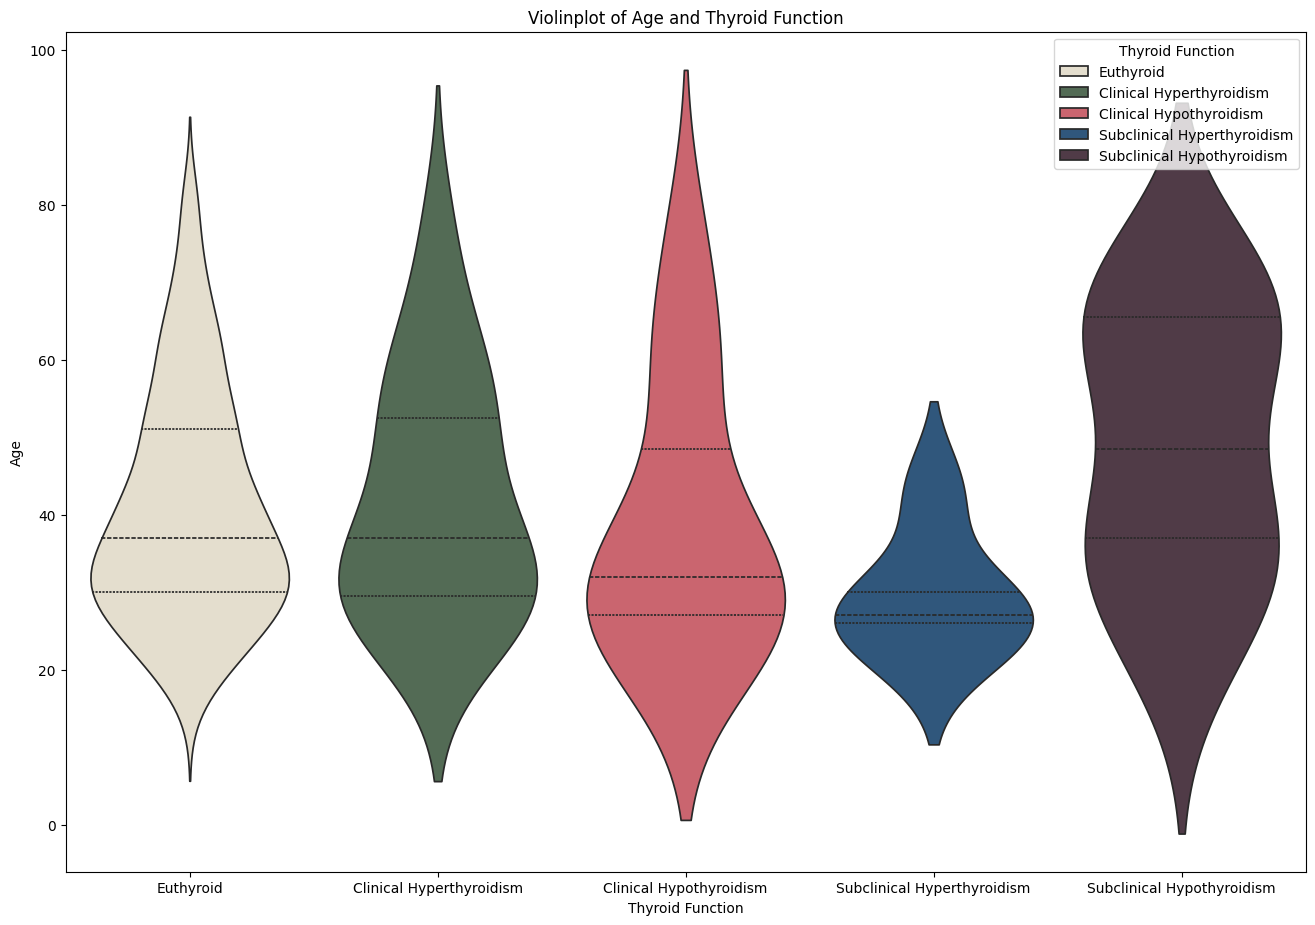

In [27]:
plt.figure(figsize=(16,24))
plt.subplot(2,1,2)
plt.title("Violinplot of Age and Thyroid Function")
sns.violinplot(x="Thyroid Function", y="Age", hue="Thyroid Function", data=df, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789", "#533747"], inner="quartile", legend="full")

Based on the violinplot above, we can see the younger people (ranging from 20-40) usually have normal thyroid function. However, more older people tend to get subclinical hypothyroidism.

### **Relationship between Factors to Reccurence**


**Histogram Analysis**

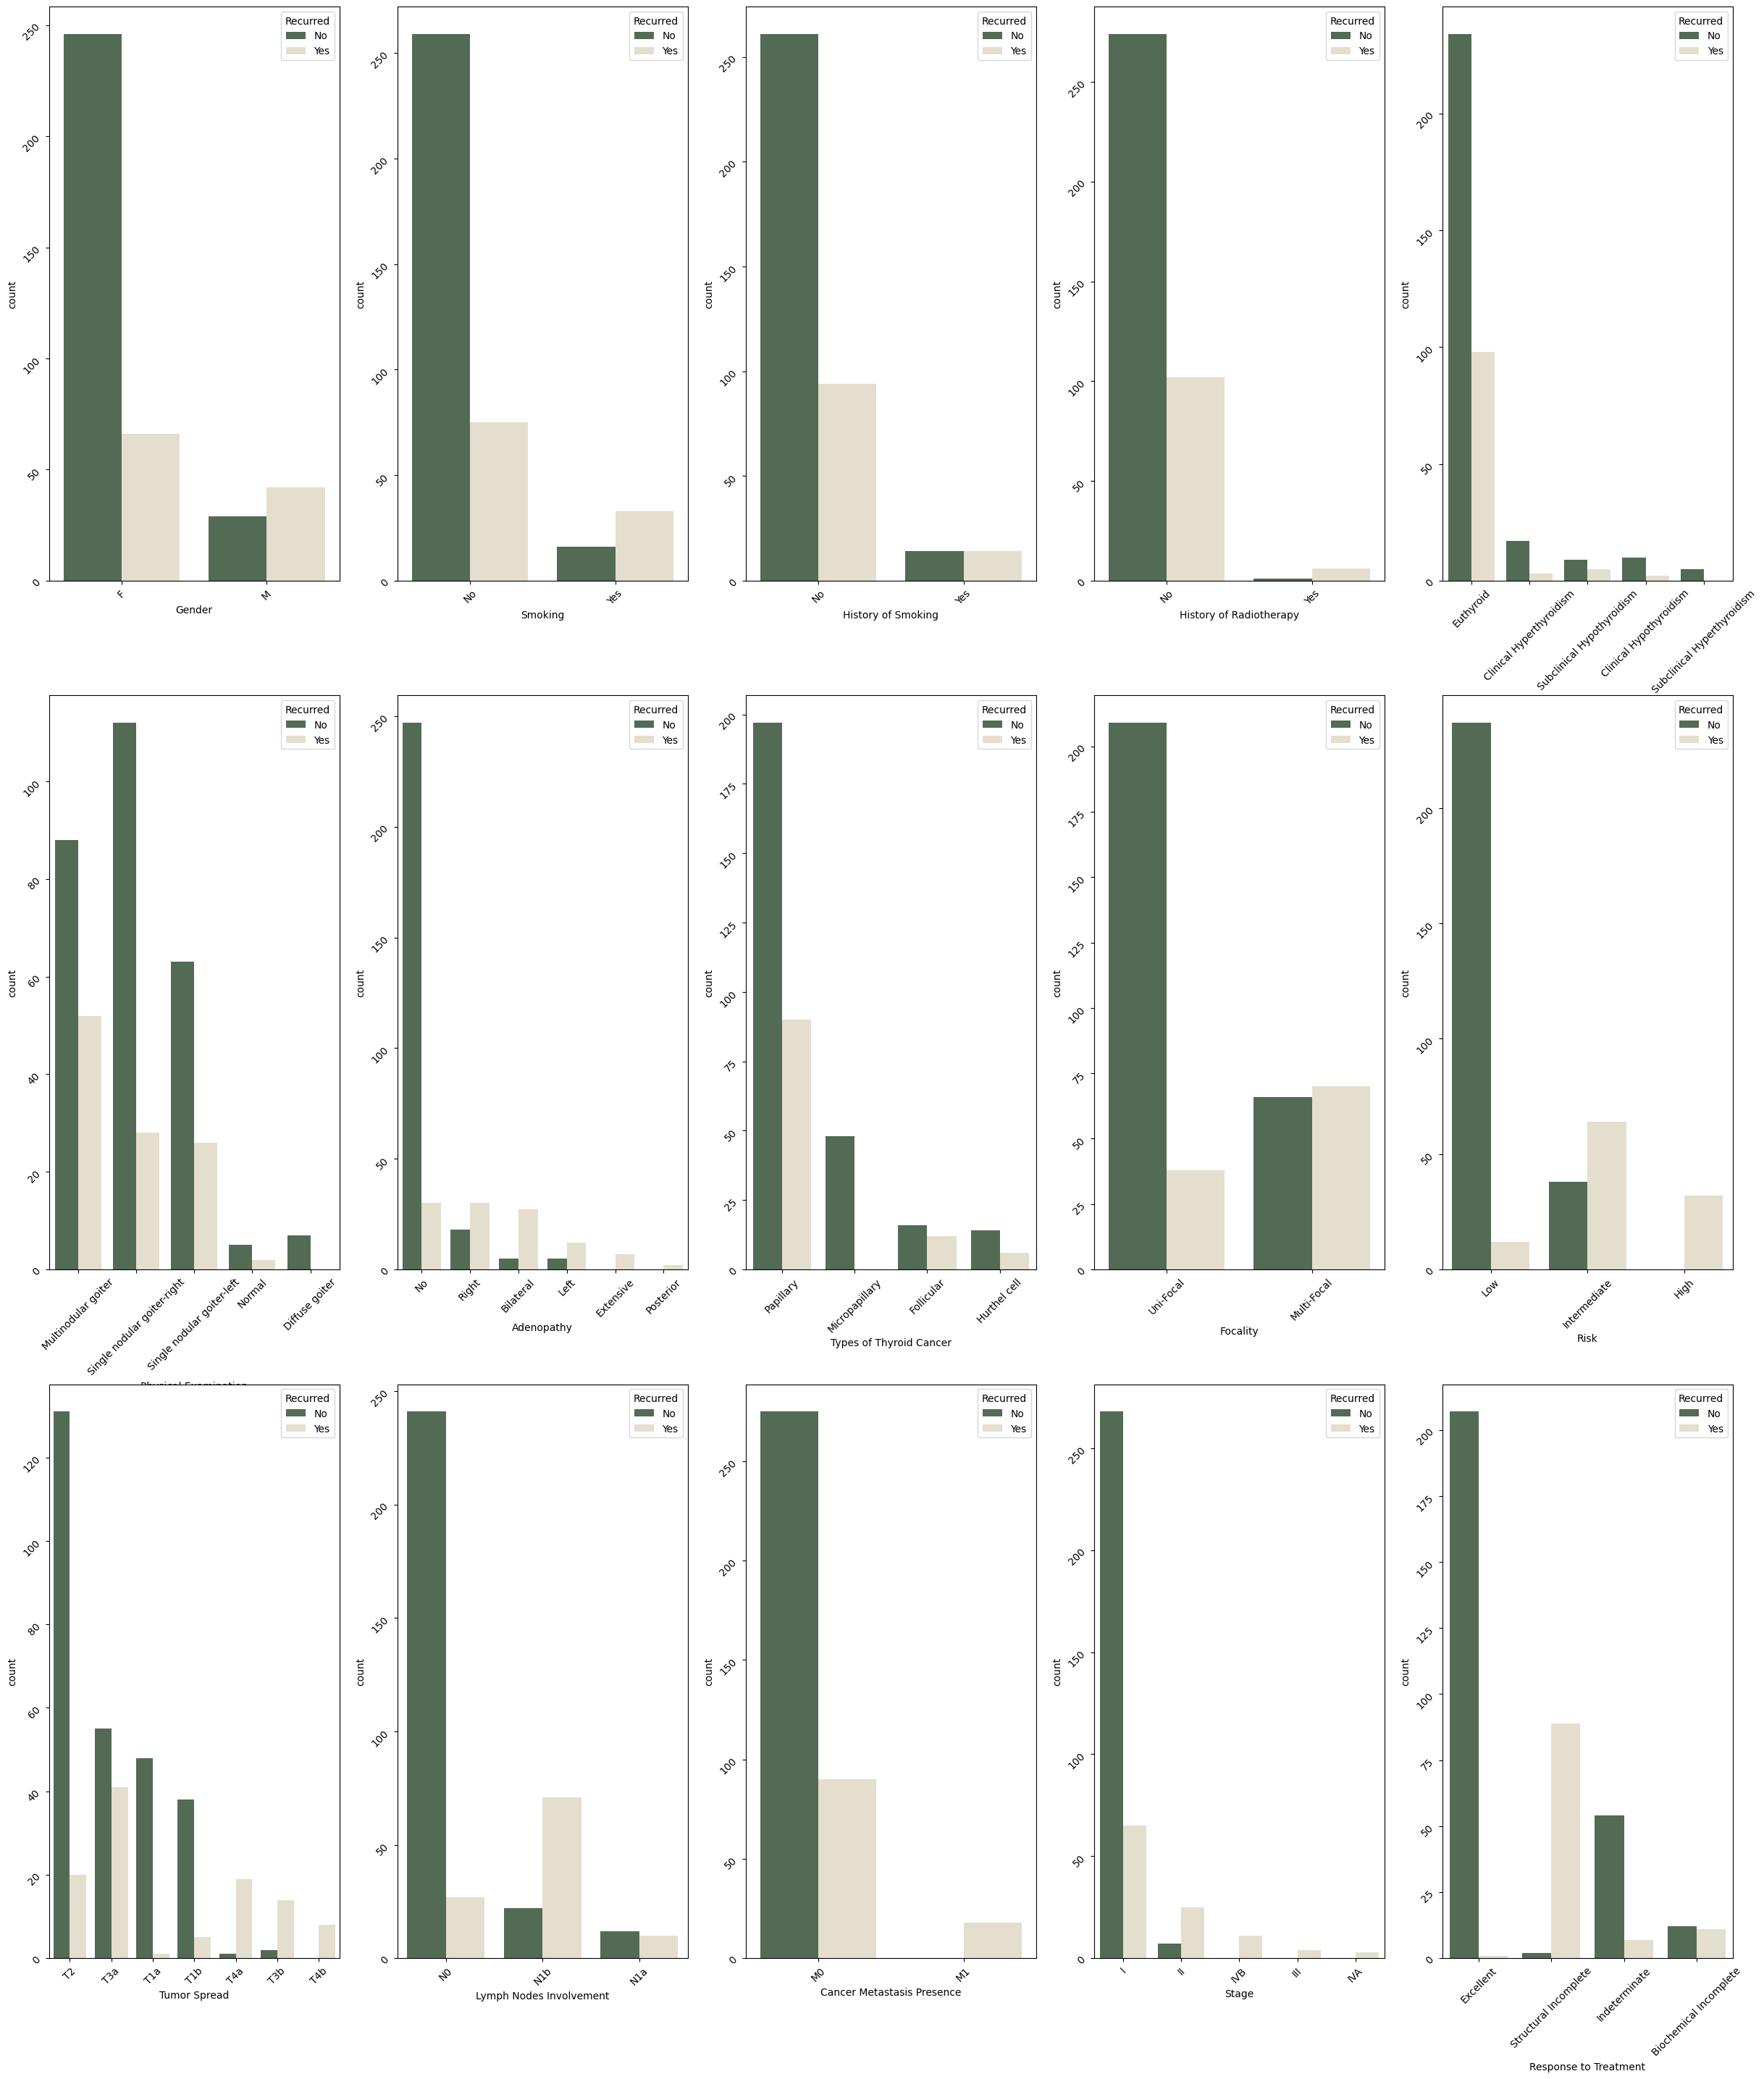

In [28]:
## Define the grid
fig, axes = plt.subplots(3, 5, figsize = (30, 35))

## Make all the countplots
sns.countplot(ax = axes[0, 0], x = 'Gender', hue="Recurred", data = df,  palette=["#4F6F52", "#E8DFCA"],
              order = df['Gender'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Smoking', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Smoking'].value_counts().index);
sns.countplot(ax = axes[0, 2], x = 'History of Smoking', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['History of Smoking'].value_counts().index);
sns.countplot(ax = axes[0, 3], x = 'History of Radiotherapy', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['History of Radiotherapy'].value_counts().index);
sns.countplot(ax = axes[0, 4], x = 'Thyroid Function', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Thyroid Function'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Physical Examination', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Physical Examination'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Adenopathy', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Adenopathy'].value_counts().index);
sns.countplot(ax = axes[1, 2], x = 'Types of Thyroid Cancer', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Types of Thyroid Cancer'].value_counts().index);
sns.countplot(ax = axes[1, 3], x = 'Focality', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Focality'].value_counts().index);
sns.countplot(ax = axes[1, 4], x = 'Risk', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Risk'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Tumor Spread', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Tumor Spread'].value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Lymph Nodes Involvement', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Lymph Nodes Involvement'].value_counts().index);
sns.countplot(ax = axes[2, 2], x = 'Cancer Metastasis Presence', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Cancer Metastasis Presence'].value_counts().index);
sns.countplot(ax = axes[2, 3], x = 'Stage', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Stage'].value_counts().index);
sns.countplot(ax = axes[2, 4], x = 'Response to Treatment', hue="Recurred", data = df, palette=["#4F6F52", "#E8DFCA"],
              order = df['Response to Treatment'].value_counts().index);

## Rotate the x labels
axes[0, 0].tick_params(labelrotation=45)
axes[0, 1].tick_params(labelrotation=45)
axes[0, 2].tick_params(labelrotation=45)
axes[0, 3].tick_params(labelrotation=45)
axes[0, 4].tick_params(labelrotation=45)
axes[1, 0].tick_params(labelrotation=45)
axes[1, 1].tick_params(labelrotation=45)
axes[1, 2].tick_params(labelrotation=45)
axes[1, 3].tick_params(labelrotation=45)
axes[1, 4].tick_params(labelrotation=45)
axes[2, 0].tick_params(labelrotation=45)
axes[2, 1].tick_params(labelrotation=45)
axes[2, 2].tick_params(labelrotation=45)
axes[2, 3].tick_params(labelrotation=45)
axes[2, 4].tick_params(labelrotation=45)

**Heatmap Analysis**

In [29]:
## Do Label Encoding for Categorical Columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

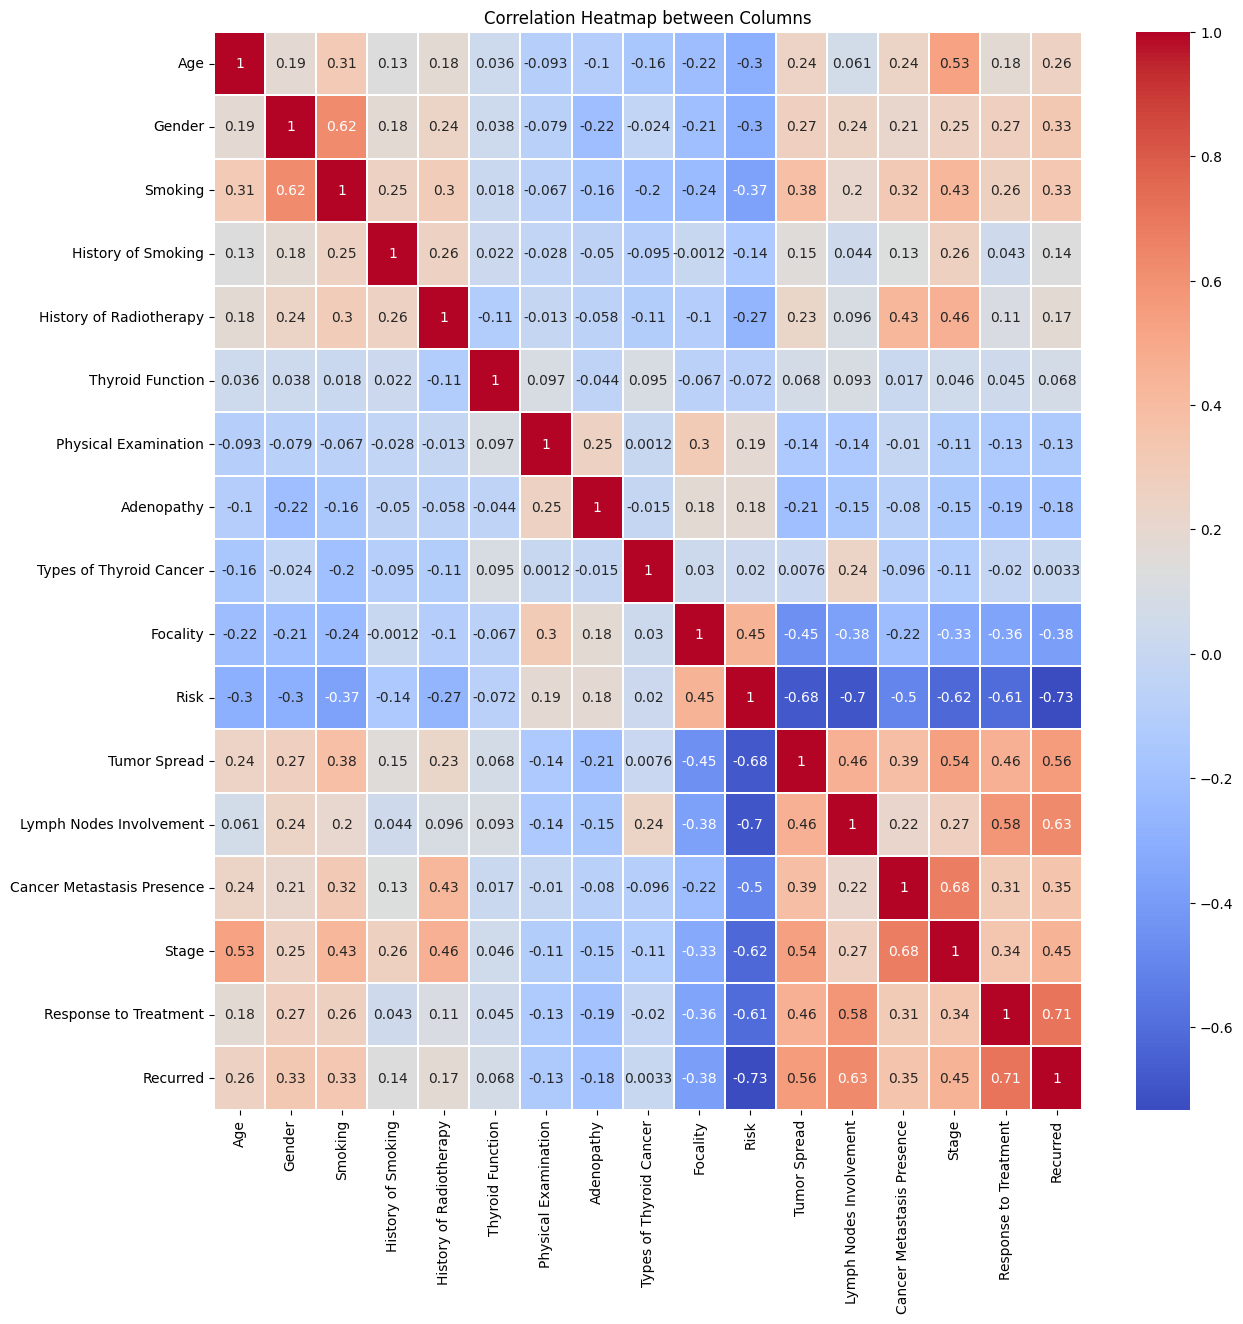

In [30]:
## Calculate the matrix using Pandas .corr()
correlation_matrix = df.corr()

# Make the heatmap using Seaborn
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap between Columns')
plt.show()

Based on the visualisations above, we can hypothesize that **some factors affect the rate of occurance** such as:
1. **Risk**: People with higher risk tend to experience higher rate of recurrence.
2. **Response to Treatment**: People with excellent response shows no recurrence while people with structural incomplete have a very high rate of recurrence.
3.   **Lymph Nodes Involvement**: Higher involvement correlates with higher recurrence (higher in N1 rather than N0)
4.   **Tumor Spread**: The more it spreads, the higher the rate of recurrence (higher ocurence in T3-T4)
5.  **Stage**: Same with metastasis presence, if we analyze the proportion, it is clear that people with later stage almost surely experience recurrence (III-IV stage)

We set the correlation threshold as 0.4 to count it as potential factors.




To further support our hypothesis above, we will perform **chi-square test** between those factors to recurrence to see the independence between the two variables.

In [31]:
import scipy
from scipy.stats import chi2_contingency

In [32]:
## Make a contingency table
cont_risk = pd.crosstab(df['Risk'], df['Recurred'])

## Perform Chi-square
chi2, p, dof, expected = chi2_contingency(cont_risk)

print("Risk Chi-Square Test")
print("")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Risk Chi-Square Test

Chi-square statistic: 208.82620309719766
p-value: 4.50781577510179e-46


In [33]:
## Make a contingency table
cont_treatment = pd.crosstab(df['Response to Treatment'], df['Recurred'])

## Perform Chi-square
chi2, p, dof, expected = chi2_contingency(cont_treatment)

print("Response to Treatment Chi-Square Test")
print("")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Response to Treatment Chi-Square Test

Chi-square statistic: 309.47232144451004
p-value: 8.863123780463506e-67


In [34]:
## Make a contingency table
cont_lymph = pd.crosstab(df['Lymph Nodes Involvement'], df['Recurred'])

## Perform Chi-square
chi2, p, dof, expected = chi2_contingency(cont_lymph)

print("Lymph Nodes Involvement")
print("")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Lymph Nodes Involvement

Chi-square statistic: 153.1867635060231
p-value: 5.443985431857947e-34


In [35]:
## Make a contingency table
cont_radio = pd.crosstab(df['Tumor Spread'], df['Recurred'])

## Perform Chi-square
chi2, p, dof, expected = chi2_contingency(cont_radio)

print("Tumor Spread Chi-Square Test")
print("")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Tumor Spread Chi-Square Test

Chi-square statistic: 141.29024573245127
p-value: 5.353537306538777e-28


In [36]:
## Make a contingency table
cont_stage = pd.crosstab(df['Stage'], df['Recurred'])

## Perform Chi-square
chi2, p, dof, expected = chi2_contingency(cont_stage)

print("Stage Chi-Square Test")
print("")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Stage Chi-Square Test

Chi-square statistic: 97.61797139627001
p-value: 3.1610731210091906e-20


The results above shows a high chi-square value with low p-value (meaning we reject the null hypothesis, that is, the two variables are independent).

However, we shall test the other factors we suspect have low correlation, such as history of smoking and history of radiotherapy.

In [37]:
## Make a contingency table
cont_thyroid_function = pd.crosstab(df['Thyroid Function'], df['Recurred'])

## Perform Chi-square
chi2, p, dof, expected = chi2_contingency(cont_thyroid_function)

print("Thyroid Function Chi-Square Test")
print("")
print("Chi-square statistic:", chi2)
print("p-value:", p)

Thyroid Function Chi-Square Test

Chi-square statistic: 5.14868693919497
p-value: 0.27237868540391813


In [38]:
## Make a contingency table
cont_history_smoking = pd.crosstab(df['History of Smoking'], df['Recurred'])

## Perform Chi-square
chi2, p, dof, expected = chi2_contingency(cont_history_smoking)

print("History of Smoking Chi-Square Test")
print("")
print("Chi-square statistic:", chi2)
print("p-value:", p)

History of Smoking Chi-Square Test

Chi-square statistic: 5.977474414669837
p-value: 0.014489737063609615


The results above show that both factors display low chi-square results with relatively high p-values (we accept the alternative hypotheses, that is, both factors are independent). This confirms our hypothesis that were derived from the histogram.

# **Modelling and Data Preparation**

In this section, we will delve into modelling using classical ML algorithms and ANN. We will also apply various data preparation process.

## **Feature Selection**

Sometimes, some features matter more than others. Hence, it's important to select the features that matter to help the model train better. The selection is based on the correlation analysis performed in the EDA process.

In [39]:
## Check the dataframe
df.head(3)

,Age,Gender,Smoking,History of Smoking,History of Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer,Focality,Risk,Tumor Spread,Lymph Nodes Involvement,Cancer Metastasis Presence,Stage,Response to Treatment,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0


In [40]:
## Define the selected features
selected_feature = ['Gender', 'Age', 'Smoking', 'Risk', 'Tumor Spread', 'Lymph Nodes Involvement', 'Cancer Metastasis Presence', 'Stage', 'Response to Treatment']

In [41]:
## Make a new dataframe containing the selected features
df_selected = pd.get_dummies(df[selected_feature + ['Recurred']], drop_first=True)

df_selected.head(3)

,Gender,Age,Smoking,Risk,Tumor Spread,Lymph Nodes Involvement,Cancer Metastasis Presence,Stage,Response to Treatment,Recurred
0,0,27,0,2,0,0,0,0,2,0
1,0,34,0,2,0,0,0,0,1,0
2,0,30,0,2,0,0,0,0,1,0


## **Scaling**

Here we will scale the **Age** feature to make it easier for the model to understand using **SKLearn's MinMaxScaler** function. We will map it to the value between 0 and 2.

In [42]:
## Import the required library
from sklearn.preprocessing import MinMaxScaler

## Initiate the instance
scaler = MinMaxScaler(feature_range=(0,2))

## Define the scaled column
scaled_columns = ["Age"]

## Copy the DF and apply the fit_transform
x_scaled = df_selected.copy()
x_scaled[scaled_columns] = scaler.fit_transform(df_selected[scaled_columns])

## Check the dataframe
x_scaled.head(3)

,Gender,Age,Smoking,Risk,Tumor Spread,Lymph Nodes Involvement,Cancer Metastasis Presence,Stage,Response to Treatment,Recurred
0,0,0.358209,0,2,0,0,0,0,2,0
1,0,0.567164,0,2,0,0,0,0,1,0
2,0,0.447761,0,2,0,0,0,0,1,0


In [43]:
## Select and isolate all the features to x
x = df_selected.iloc[:,:-1]

x.head(3)

,Gender,Age,Smoking,Risk,Tumor Spread,Lymph Nodes Involvement,Cancer Metastasis Presence,Stage,Response to Treatment
0,0,27,0,2,0,0,0,0,2
1,0,34,0,2,0,0,0,0,1
2,0,30,0,2,0,0,0,0,1


In [44]:
## Select and isolate the label to y
y = df_selected.iloc[:,-1:]

y.head(3)

,Recurred
0,0
1,0
2,0


## **Dataset Splitting and Augmentation**

We will split the data into two parts: **training set and validation set**. Furthermore, since the data is imbalanced **we will use SMOTE** to generate synthetic data. The synthetic data also helps adding the number of data available for the model to train to. However, we will **only use the augmented dataset for the training process**, not to test it.

In [45]:
## Import the required library
from sklearn.model_selection import train_test_split

## Define the variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) ## Here we use a ratio of 70/30 since the dataset is quite small

In [46]:
## Import the required library
from imblearn.over_sampling import SMOTE

## Initiate the instance
smote = SMOTE(random_state=25)

## Augment the training dataset
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [47]:
## Install catboost since it's not preinstalled in Google Collab by default
!pip install catboost

## **Classical ML Algorithms**
In this section, we will try various **classical ML algorithms, such as K-Nearest Neighbour, Random Forest, Adaptive Boosting, Gradient Boosting, and Catboosting.** We will use GridSearch to help us tuning the hyperparameters.

### **Model Training**
Each model will be trained in this section using GridSearch.

In [48]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score, roc_auc_score, recall_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier, Pool

# Initialise all the params
knn_params = {
    'n_neighbors': [2, 4, 6, 8, 10, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

rf_params = {
    'n_estimators': [20, 30, 50, 80, 100],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

ada_params = {
    'estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [10, 25, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'algorithm': ['SAMME', 'SAMME.R']
}

gb_params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'loss': ['log_loss', 'exponential'],
    'max_depth': [2, 4, 6],
    'subsample': [0.5, 0.8, 1.0]
}

cat_params = {
    'iterations': [100, 200, 500, 800],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.03, 0.1],
    'l2_leaf_reg': [2, 5],
    'rsm': [0.5, 0.7],
    'loss_function': ['Logloss', 'MultiClass']
}

In [49]:
## K-Nearest Neighbour
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_model.fit(x_train_resampled, y_train_resampled)

best_knn = knn_model.best_estimator_
knn_y_pred = best_knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_auc_roc = roc_auc_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [50]:
## Random Forest
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_model.fit(x_train_resampled, y_train_resampled)

best_rf = rf_model.best_estimator_

rf_y_pred = best_rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_auc_roc = roc_auc_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [51]:
## Adaptive Boosting
ada_model = GridSearchCV(AdaBoostClassifier(), ada_params, cv=5, scoring='accuracy')
ada_model.fit(x_train_resampled, y_train_resampled)

best_ada = ada_model.best_estimator_


ada_y_pred = best_ada.predict(x_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)
ada_f1 = f1_score(y_test, ada_y_pred)
ada_auc_roc = roc_auc_score(y_test, ada_y_pred)
ada_recall = recall_score(y_test, ada_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [52]:
## Gradient Boosting
gb_model = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5, scoring='accuracy')
gb_model.fit(x_train_resampled, y_train_resampled)

best_gb = gb_model.best_estimator_

gb_y_pred = best_gb.predict(x_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)
gb_auc_roc = roc_auc_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [53]:
## Catboost
catboost_model = GridSearchCV(CatBoostClassifier(), cat_params, cv=5, scoring='accuracy')
catboost_pool = Pool(x_train_resampled, y_train_resampled)
x_catboost = catboost_pool.get_features()
y_catboost= catboost_pool.get_label()
catboost_model.fit(x_catboost, y_catboost)

best_cat = catboost_model.best_estimator_

catboost_pred = best_cat.predict(x_test)
catboost_accuracy = accuracy_score(y_test, catboost_pred)
catboost_f1 = f1_score(y_test, catboost_pred)
catboost_auc_roc = roc_auc_score(y_test, catboost_pred)
catboost_recall = recall_score(y_test, catboost_pred)

Streaming output truncated to the last 5000 lines.
300:	learn: 0.0275009	total: 338ms	remaining: 561ms
301:	learn: 0.0273968	total: 339ms	remaining: 559ms
302:	learn: 0.0272828	total: 340ms	remaining: 558ms
303:	learn: 0.0271707	total: 341ms	remaining: 557ms
304:	learn: 0.0271147	total: 342ms	remaining: 555ms
305:	learn: 0.0270111	total: 343ms	remaining: 553ms
306:	learn: 0.0269262	total: 344ms	remaining: 552ms
307:	learn: 0.0267854	total: 345ms	remaining: 551ms
308:	learn: 0.0267091	total: 346ms	remaining: 550ms
309:	learn: 0.0266292	total: 347ms	remaining: 549ms
310:	learn: 0.0265342	total: 348ms	remaining: 548ms
311:	learn: 0.0264390	total: 349ms	remaining: 546ms
312:	learn: 0.0263575	total: 350ms	remaining: 544ms
313:	learn: 0.0262495	total: 351ms	remaining: 543ms
314:	learn: 0.0261600	total: 352ms	remaining: 542ms
315:	learn: 0.0260532	total: 353ms	remaining: 541ms
316:	learn: 0.0259834	total: 354ms	remaining: 540ms
317:	learn: 0.0258918	total: 356ms	remaining: 539ms
318:	learn: 0

##### **Best KNN**

Text(0, 0.5, 'Average Test Score')

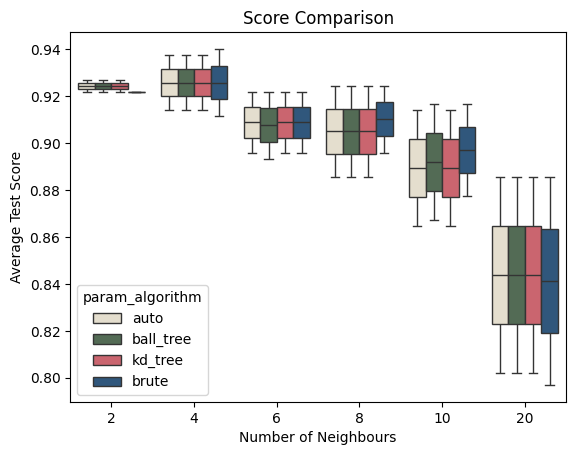

In [54]:
knn_results = pd.DataFrame(knn_model.cv_results_)

sns.boxplot(x='param_n_neighbors', y='mean_test_score', hue='param_algorithm', data=knn_results, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789"]).set_title("Score Comparison")
plt.xlabel("Number of Neighbours")
plt.ylabel("Average Test Score")

In [55]:
print("Best Parameters for KNN:", knn_model.best_params_)
print("Best KNN Score:", knn_model.best_score_)

Best Parameters for KNN: {'algorithm': 'brute', 'n_neighbors': 4, 'weights': 'distance'}
Best KNN Score: 0.9401572112098429


##### **Best RF**

Text(0, 0.5, 'Average Test Score')

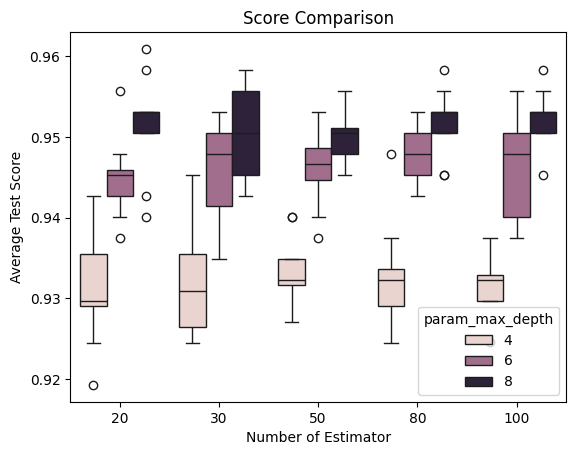

In [56]:
rf_results = pd.DataFrame(rf_model.cv_results_)

sns.boxplot(x='param_n_estimators', y='mean_test_score', hue='param_max_depth', data=rf_results).set_title("Score Comparison")
plt.xlabel("Number of Estimator")
plt.ylabel("Average Test Score")

In [57]:
print("Best Parameters for RF:", rf_model.best_params_)
print("Best Score:", rf_model.best_score_)

Best Parameters for RF: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 20}
Best Score: 0.9609364319890634


##### **Best Adaboost**

Text(0, 0.5, 'Average Test Score')

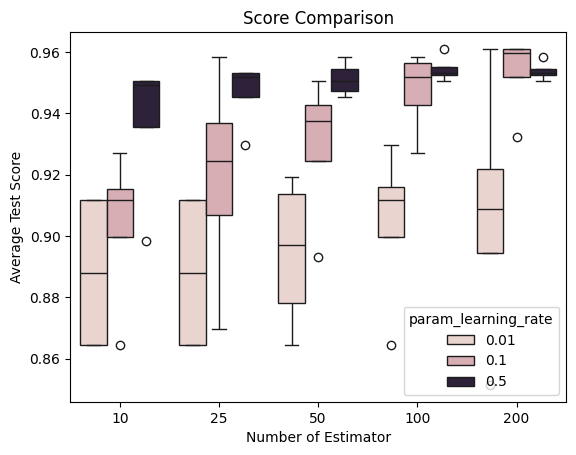

In [58]:
ada_results = pd.DataFrame(ada_model.cv_results_)

sns.boxplot(x='param_n_estimators', y='mean_test_score', hue='param_learning_rate', data=ada_results).set_title("Score Comparison")
plt.xlabel("Number of Estimator")
plt.ylabel("Average Test Score")

In [59]:
print("Best Parameters for Adaboost:", ada_model.best_params_)
print("Best Score:", ada_model.best_score_)

Best Parameters for Adaboost: {'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.1, 'n_estimators': 200}
Best Score: 0.9609364319890636


##### **Best GBoost**

Text(0, 0.5, 'Average Test Score')

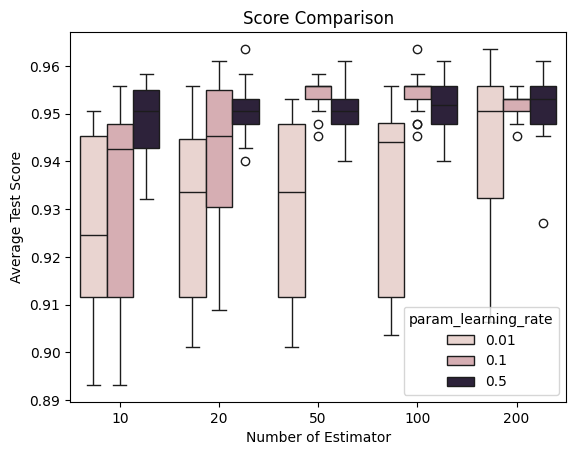

In [60]:
gb_results = pd.DataFrame(gb_model.cv_results_)

sns.boxplot(x='param_n_estimators', y='mean_test_score', hue='param_learning_rate', data=gb_results).set_title("Score Comparison")
plt.xlabel("Number of Estimator")
plt.ylabel("Average Test Score")

In [61]:
print("Best Parameters for Gboost:", gb_model.best_params_)
print("Best Score:", gb_model.best_score_)

Best Parameters for Gboost: {'learning_rate': 0.5, 'loss': 'exponential', 'max_depth': 2, 'n_estimators': 20, 'subsample': 0.8}
Best Score: 0.963568010936432


##### **Best Catboost**

Text(0, 0.5, 'Average Test Score')

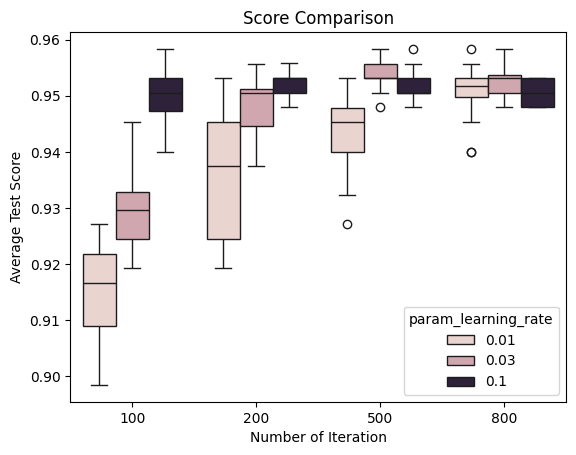

In [62]:
cat_results = pd.DataFrame(catboost_model.cv_results_)

sns.boxplot(x='param_iterations', y='mean_test_score', hue='param_learning_rate', data=cat_results).set_title("Score Comparison")
plt.xlabel("Number of Iteration")
plt.ylabel("Average Test Score")

In [63]:
print("Best Parameters for Catboost:", catboost_model.best_params_)
print("Best Score:", catboost_model.best_score_)

Best Parameters for Catboost: {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.03, 'loss_function': 'Logloss', 'rsm': 0.7}
Best Score: 0.9583390293916609


### **Model Evaluation**
Evaluation of each model using the agreed metrics defined in the business understanding document (M1).

**Accuracy**

The accuracy score for each model and how they compare to each other.

In [64]:
print(f'KNN Accuracy: {knn_accuracy * 100:.2f}%')
print(f'RF Accuracy: {rf_accuracy * 100:.2f}%')
print(f'Ada Accuracy {ada_accuracy * 100:.2f}%')
print(f'GB Accuracy: {gb_accuracy * 100:.2f}%')
print(f'Catboost Accuracy: {catboost_accuracy * 100:.2f}%')

KNN Accuracy: 90.43%
RF Accuracy: 96.52%
Ada Accuracy 94.78%
GB Accuracy: 95.65%
Catboost Accuracy: 95.65%


[Text(0, 0, '95.65%')]

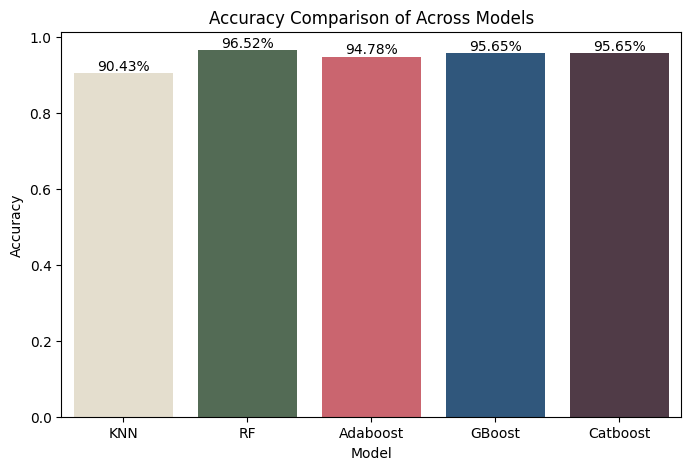

In [65]:
## Initialise Labels
labels = ['KNN', 'RF', 'Adaboost', 'GBoost', 'Catboost']

## Make the array
accuracies = [knn_accuracy, rf_accuracy, ada_accuracy, gb_accuracy, catboost_accuracy]

## Make the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=labels, y=accuracies, hue=labels, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789", "#533747"])
ax.set_xlabel("Model")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy Comparison of Across Models")

## Set the labels
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[1], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[2], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[3], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[4], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')

**Recall**

The recall score for each model and how they compare to each other.

In [66]:
print(f"KNN Recall: {knn_recall* 100:.2f}%")
print(f"RF Recall: {rf_recall* 100:.2f}%")
print(f"Ada Recall: {ada_recall* 100:.2f}%")
print(f"GB Recall: {gb_recall* 100:.2f}%")
print(f"Catboost Recall: {catboost_recall* 100:.2f}%")

KNN Recall: 78.12%
RF Recall: 96.88%
Ada Recall: 96.88%
GB Recall: 96.88%
Catboost Recall: 96.88%


[Text(0, 0, '96.88%')]

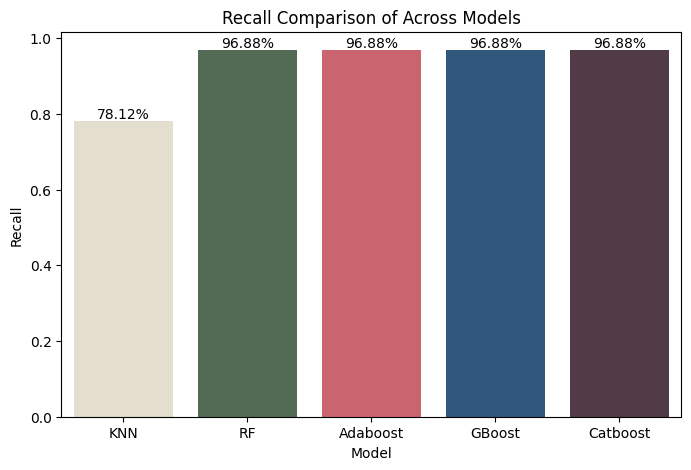

In [67]:
## Initialise Labels
labels = ['KNN', 'RF', 'Adaboost', 'GBoost', 'Catboost']

## Make the array
recalls = [knn_recall, rf_recall, ada_recall, gb_recall, catboost_recall]

## Make the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=labels, y=recalls, hue=labels, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789", "#533747"])
ax.set_xlabel("Model")
ax.set_ylabel("Recall")
ax.set_title("Recall Comparison of Across Models")

## Set the labels
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[1], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[2], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[3], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[4], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')

**F1**

The F1 score for each model and how they compare to each other.

In [68]:
print(f"KNN F1: {knn_f1* 100:.2f}%")
print(f"RF F1: {rf_f1* 100:.2f}%")
print(f"Ada F1: {ada_f1* 100:.2f}%")
print(f"GB F1: {gb_f1* 100:.2f}%")
print(f"Catboost F1: {catboost_f1* 100:.2f}%")

KNN F1: 81.97%
RF F1: 93.94%
Ada F1: 91.18%
GB F1: 92.54%
Catboost F1: 92.54%


[Text(0, 0, '92.54%')]

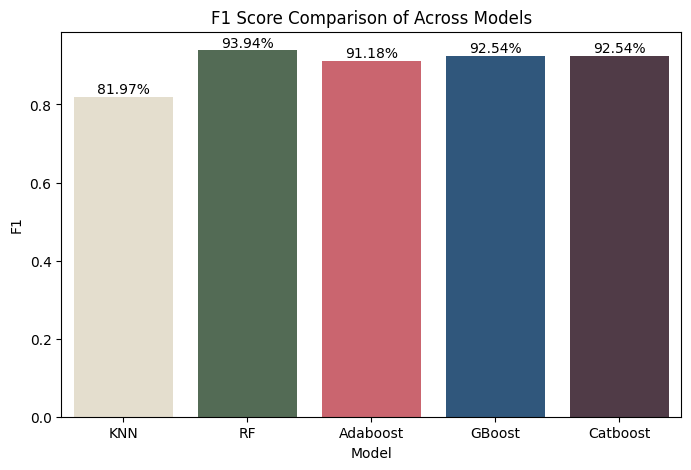

In [69]:
## Initialise Labels
labels = ['KNN', 'RF', 'Adaboost', 'GBoost', 'Catboost']

## Make the array
f1s = [knn_f1, rf_f1, ada_f1, gb_f1, catboost_f1]

## Make the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=labels, y=f1s, hue=labels, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789", "#533747"])
ax.set_xlabel("Model")
ax.set_ylabel("F1")
ax.set_title("F1 Score Comparison of Across Models")

## Set the labels
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[1], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[2], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[3], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[4], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')

**AUC-ROC**

The AUC-ROC value for each model and how they compare to each other.

In [70]:
print(f"KNN AUC-ROC: {knn_auc_roc* 100:.2f}%")
print(f"RF AUC-ROC: {rf_auc_roc* 100:.2f}%")
print(f"Ada AUC-ROC: {ada_auc_roc* 100:.2f}%")
print(f"GB AUC-ROC: {gb_auc_roc* 100:.2f}%")
print(f"Catboost AUC-ROC: {catboost_auc_roc* 100:.2f}%")

KNN AUC-ROC: 86.65%
RF AUC-ROC: 96.63%
Ada AUC-ROC: 95.43%
GB AUC-ROC: 96.03%
Catboost AUC-ROC: 96.03%


[Text(0, 0, '96.03%')]

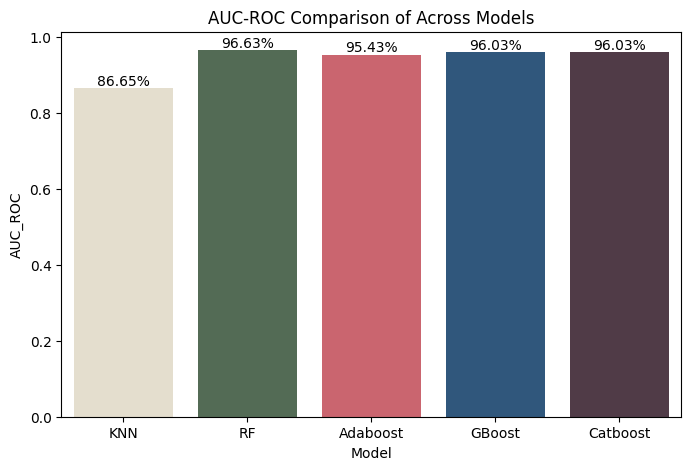

In [71]:
## Initialise Labels
labels = ['KNN', 'RF', 'Adaboost', 'GBoost', 'Catboost']

## Make the array
auc_rocs = [knn_auc_roc, rf_auc_roc, ada_auc_roc, gb_auc_roc, catboost_auc_roc]

## Make the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=labels, y=auc_rocs, hue=labels, palette=["#E8DFCA", "#4F6F52", "#db5461", "#235789", "#533747"])
ax.set_xlabel("Model")
ax.set_ylabel("AUC_ROC")
ax.set_title("AUC-ROC Comparison of Across Models")

## Set the labels
ax.bar_label(ax.containers[0], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[1], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[2], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[3], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')
ax.bar_label(ax.containers[4], fontsize=10, fmt=lambda x: f'{x*100:.2f}%')

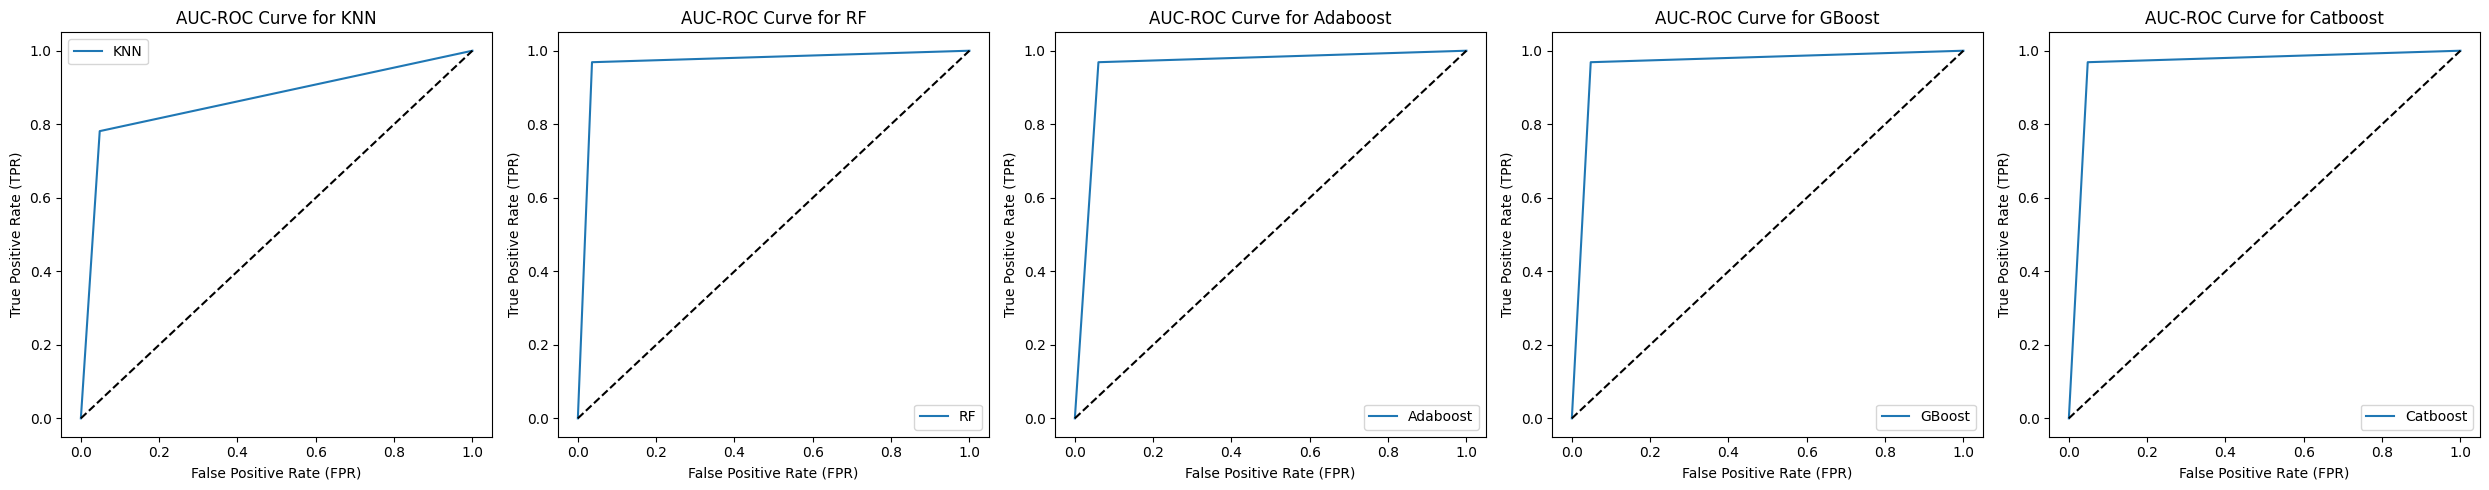

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Labels
labels = ['KNN', 'RF', 'Adaboost', 'GBoost', 'Catboost']

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharex=True, squeeze=False)

# --- KNN ---
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred)
sns.lineplot(x=fpr, y=tpr, label=labels[0], ax=axes[0, 0])
axes[0, 0].plot([0, 1], [0, 1], 'k--')
axes[0, 0].set_xlabel("False Positive Rate (FPR)")
axes[0, 0].set_ylabel("True Positive Rate (TPR)")
axes[0, 0].set_title(f"AUC-ROC Curve for {labels[0]}")

# --- RF ---
fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred)
sns.lineplot(x=fpr, y=tpr, label=labels[1], ax=axes[0, 1])
axes[0, 1].plot([0, 1], [0, 1], 'k--')
axes[0, 1].set_xlabel("False Positive Rate (FPR)")
axes[0, 1].set_ylabel("True Positive Rate (TPR)")
axes[0, 1].set_title(f"AUC-ROC Curve for {labels[1]}")

# --- Adaboost ---
fpr, tpr, thresholds = roc_curve(y_test, ada_y_pred)
sns.lineplot(x=fpr, y=tpr, label=labels[2], ax=axes[0, 2])
axes[0, 2].plot([0, 1], [0, 1], 'k--')
axes[0, 2].set_xlabel("False Positive Rate (FPR)")
axes[0, 2].set_ylabel("True Positive Rate (TPR)")
axes[0, 2].set_title(f"AUC-ROC Curve for {labels[2]}")

# --- GBoost ---
fpr, tpr, thresholds = roc_curve(y_test, gb_y_pred)
sns.lineplot(x=fpr, y=tpr, label=labels[3], ax=axes[0, 3])
axes[0, 3].plot([0, 1], [0, 1], 'k--')
axes[0, 3].set_xlabel("False Positive Rate (FPR)")
axes[0, 3].set_ylabel("True Positive Rate (TPR)")
axes[0, 3].set_title(f"AUC-ROC Curve for {labels[3]}")


# --- Catboost ---
fpr, tpr, thresholds = roc_curve(y_test, catboost_pred)
sns.lineplot(x=fpr, y=tpr, label=labels[4], ax=axes[0, 4])
axes[0, 4].plot([0, 1], [0, 1], 'k--')
axes[0, 4].set_xlabel("False Positive Rate (FPR)")
axes[0, 4].set_ylabel("True Positive Rate (TPR)")
axes[0, 4].set_title(f"AUC-ROC Curve for {labels[4]}")

plt.tight_layout()
plt.show()

**Confusion Matrix**

A heatmap of the confusion matrix for each model.

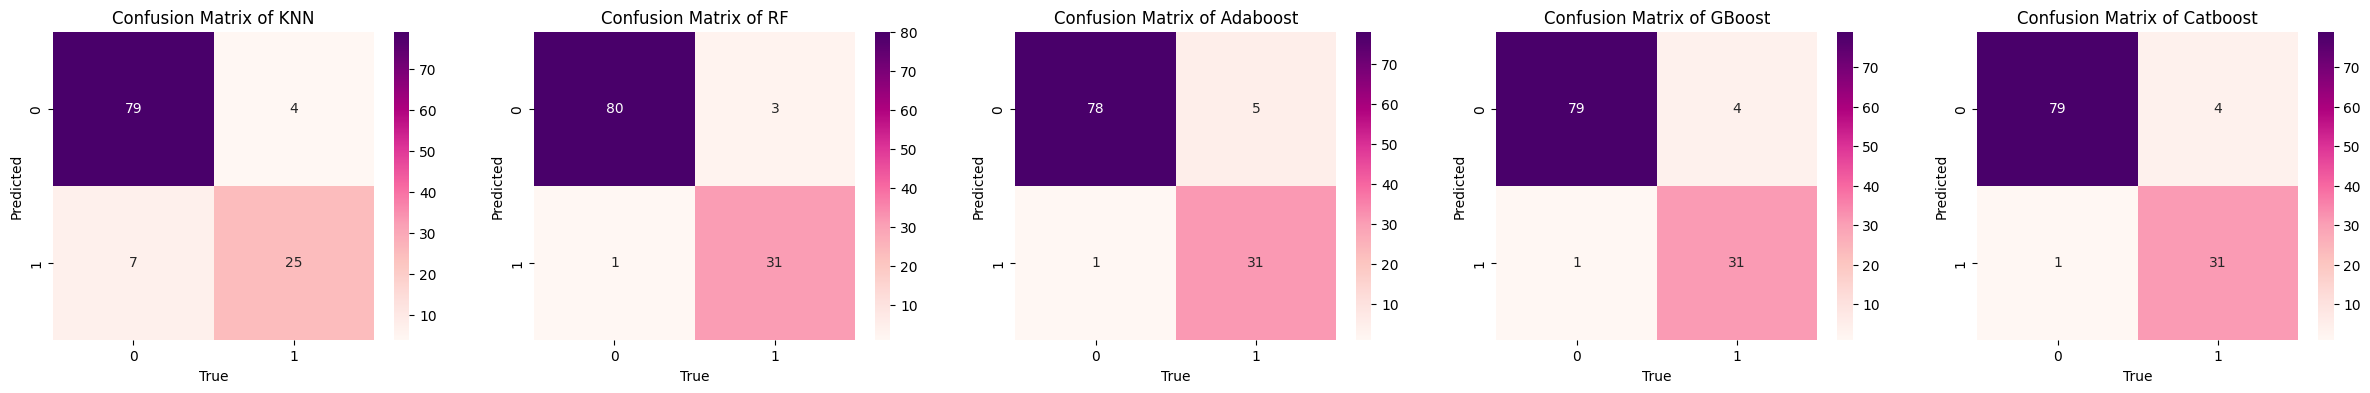

In [139]:
from sklearn.metrics import confusion_matrix
## Define the grid
fig, axes = plt.subplots(1, 5, figsize = (30, 4))

## Make all the countplots

sns.heatmap(ax=axes[0], data=confusion_matrix(y_test, knn_y_pred), cmap='RdPu', annot=True).set_title("Confusion Matrix of KNN")
axes[0].set_ylabel("Predicted")
axes[0].set_xlabel("True")

sns.heatmap(ax=axes[1], data=confusion_matrix(y_test, rf_y_pred), cmap='RdPu', annot=True).set_title("Confusion Matrix of RF")
axes[1].set_ylabel("Predicted")
axes[1].set_xlabel("True")

sns.heatmap(ax=axes[2], data=confusion_matrix(y_test, ada_y_pred), cmap='RdPu', annot=True).set_title("Confusion Matrix of Adaboost")
axes[2].set_ylabel("Predicted")
axes[2].set_xlabel("True")

sns.heatmap(ax=axes[3], data=confusion_matrix(y_test, gb_y_pred), cmap='RdPu', annot=True).set_title("Confusion Matrix of GBoost")
axes[3].set_ylabel("Predicted")
axes[3].set_xlabel("True")

sns.heatmap(ax=axes[4], data=confusion_matrix(y_test, catboost_pred), cmap='RdPu', annot=True).set_title("Confusion Matrix of Catboost")
axes[4].set_ylabel("Predicted")
axes[4].set_xlabel("True")

plt.xlabel("True")
plt.show()

**Conclusion**

Based on the tests above, we can safely conclude that **Random Forest** is the **best model** amongst other models. It displayed a solid perfomance with metrics as follow:
1.   **Accuracy**: 96.52%
2.   **Recall**: 96,88%
3.   **F1**: 93,94%
4.   **AUC-ROC**: 96.63%

Catboost performs similary well, followed by Adaptive Boosting, Gradient Boosting, and K-Nearest Neighbour as the worst performer.


## **Artificial Neural Network (ANN)**

In this section, we will try using **Artificial Neural Network (ANN)** using **TensorFlow** with **Keras API**.

### **Model Training**

We will make and train the model here.

In [134]:
## Import relevant libraries

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1_l2, l2
from keras.callbacks import EarlyStopping

In [122]:
## We use Sequential model here since the data is tabular and structured
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=x_train_resampled.shape[1])) ## Add the first Dense layer and define the input dimension
model.add(Dropout(0.3)) ## Add Dropout layer to prevent overfitting
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.15, l2=0.3)))
model.add(Dropout(0.3)) ## Another Dropout layer to prevent overfitting
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation="sigmoid")) ## Since the problem is a binary classification (meaning it's a 1 or 0),
                                          ## then set the last layer to one neuron with sigmoid activation function (0-1)

## Initialize the callback function for early stopping
callback = EarlyStopping(
    monitor='val_loss', ## Monitor the value loss
    patience=64, ## Set the patience to 64 to avoid getting trapped in local minima
    mode='min',
    restore_best_weights=True
)

## Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.005), ## Use a bigger learning rate to make the result a bit unstable,
                                                   ## thus preventing getting trapped in local optima
              loss="binary_crossentropy",
              metrics=['accuracy'])

## Train the model
history = model.fit(x_train_resampled,
                    y_train_resampled,
                    epochs=256, ## The Epoch number is set to 256 since if the model doesn't get better, it will stop thanks to the Early Stopping anyway
                    batch_size=32, ## Use the default number
                    validation_data=(x_test, y_test),
                    callbacks=[callback])

Epoch 1/256
12/12 [==============================] - 2s 25ms/step - loss: 42.0770 - accuracy: 0.4818 - val_loss: 30.2304 - val_accuracy: 0.2870
Epoch 2/256
12/12 [==============================] - 0s 7ms/step - loss: 22.9362 - accuracy: 0.5521 - val_loss: 15.4407 - val_accuracy: 0.5913
Epoch 3/256
12/12 [==============================] - 0s 6ms/step - loss: 11.0645 - accuracy: 0.5234 - val_loss: 6.8696 - val_accuracy: 0.2783
Epoch 4/256
12/12 [==============================] - 0s 7ms/step - loss: 4.6680 - accuracy: 0.4792 - val_loss: 2.7315 - val_accuracy: 0.3043
Epoch 5/256
12/12 [==============================] - 0s 7ms/step - loss: 2.1616 - accuracy: 0.5078 - val_loss: 1.7857 - val_accuracy: 0.2870
Epoch 6/256
12/12 [==============================] - 0s 6ms/step - loss: 1.4444 - accuracy: 0.5417 - val_loss: 1.2092 - val_accuracy: 0.7130
Epoch 7/256
12/12 [==============================] - 0s 8ms/step - loss: 1.1197 - accuracy: 0.5234 - val_loss: 1.0150 - val_accuracy: 0.7217
Epoch 8

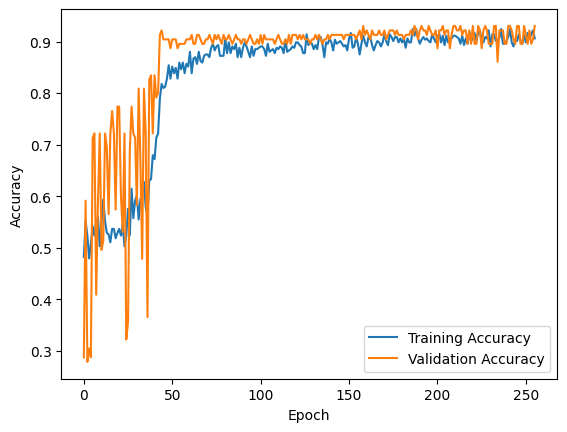

In [123]:
## Plot the training and validation accuracy of the model to see how the model performs with each epoch
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [124]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                640       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (

### **Model Evaluation**

We will evaluate the model using various metrics that have been agreed in the business understanding document (M1).

In [125]:
# Predict probabilities for test set
yhat_probs = model.predict(x_test, verbose=0)
# Classify each datum by setting a threshold of 0.5 (remember, we use the sigmoid function in the last year)
yhat_classes = (yhat_probs > 0.5).astype("int32")

# Reduce to one dimensional array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

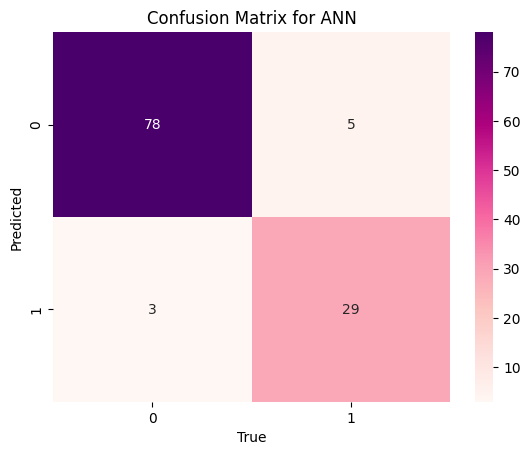

In [126]:
## Plot the result to a confusion matrix using Seaborn
sns.heatmap(confusion_matrix(y_test, yhat_classes), cmap = 'RdPu', annot = True)
plt.title("Confusion Matrix for ANN")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [127]:
# Accuracy: (tp + tn) / (p + n)
ann_accuracy = accuracy_score(y_test, yhat_classes)
print(f'Accuracy: {ann_accuracy * 100:.2f}%')
# Recall: tp / (tp + fn)
ann_recall = recall_score(y_test, yhat_classes)
print(f'Recall: {ann_recall * 100:.2f}%')
# F1: 2 tp / (2 tp + fp + fn)
ann_f1 = f1_score(y_test, yhat_classes)
print(f'F1 score: {ann_f1 * 100:.2f}%')
# ROC-AUC
ann_auc = roc_auc_score(y_test, yhat_probs)
print(f'ROC AUC: {ann_auc * 100:.2f}%')

## Code taken from https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/
## Modified by 18221130 Rayhan M since the function predict_classes is deprecated in the newer version of TF and Keras

Accuracy: 93.04%
Recall: 90.62%
F1 score: 87.88%
ROC AUC: 96.72%


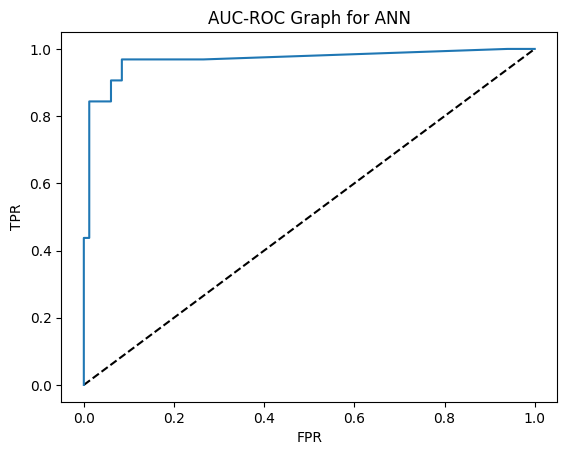

In [128]:
## Plot the result to an AUC-ROC Graph using matplotlib
fpr, tpr, thresholds = roc_curve(y_test, yhat_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = "RFC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Graph for ANN")
plt.show()

## Modified from https://www.kaggle.com/code/ssyyhh/ml-rfc-98-2

## **Summary**

In [136]:
models = ['KNN', 'RF', 'Adaboost', 'GBoost', 'Catboost', 'ANN']
accuracy = [knn_accuracy, rf_accuracy, ada_accuracy, gb_accuracy, catboost_accuracy, ann_accuracy]
recall = [knn_recall, rf_recall, ada_recall, gb_recall, catboost_recall, ann_recall]
f1 = [knn_f1, rf_f1, ada_f1, gb_f1, catboost_f1, ann_f1]
auc_roc = [knn_auc_roc, rf_auc_roc, ada_auc_roc, gb_auc_roc, catboost_auc_roc, ann_auc]

# Create a dictionary
data = {
    'Model': models,
    'Accuracy': accuracy,
    'Recall': recall,
    'F1-Score': f1,
    'AUC-ROC': auc_roc
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Display the table
df

,Model,Accuracy,Recall,F1-Score,AUC-ROC
0,KNN,0.904348,0.78125,0.819672,0.866529
1,RF,0.965217,0.96875,0.939394,0.966303
2,Adaboost,0.947826,0.96875,0.911765,0.954255
3,GBoost,0.956522,0.96875,0.925373,0.960279
4,Catboost,0.956522,0.96875,0.925373,0.960279
5,ANN,0.930435,0.90625,0.878788,0.967244


We can conclude that **RF** is best mode amongst other model.